<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Assignment 2: Data Modelling</strong></h1>

Tran Ngoc Anh Thu: s3879312

Comprehensive data preparation, exploration, visualization, feature engineering, and regression modeling for a case study: Predict severity level of car accidents in the USA from 2016-2020 using regression models.

# Hypothesis forming:
+ What time of day and day of the week do most major incidents happen?
+ Are there any patterns in the day, week, month, year when significant incidents occur?
+ What characteristics stand out in significant incidents compared with other accidents?

<hr>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Table of Content</strong></h1>

### 1. [General Requirement](#1)

1.1 [Overview](#1.1)

1.2 [Required  Libraries](#1.2)

<br>

### 2. [Data Preparation & Data exploration (EDA)](#2)

2.1 [Data Preparation](#2.1)

2.2 [Check data types & Make the data homogeneous](#2.2)

2.3 [Missing Values](#2.3)
+ [Guess the missingness type](#2.3.1)
+ [Drop missing values pairwise for train and validation set by deleting their rows](#2.3.2)
+ [Drop missing values listwise for all the datasets by deleting their columns](#2.3.3)
+ [Interpolate() - Nearest Value imputation for Weather_Timestamp](#2.3.4)
+ [Median & Frequent Categorical Imputation for Weather Continuous features](#2.3.5)
+ [Impute Median and Mode for the rest- assume that there is random order of missing values](#2.3.6)

2.4 [Shorten and Simplify categories](#2.4)
+ [2.4.1 Time-series columns - break them down into hour, minute, and weekday](#2.4.1)
+ [2.4.2 Shorten & Simplify the Wind Direction](#2.4.2)

2.5 [Typos](#2.5)
+ [2.5.1 Check for typos in the dataset](#2.5.1)
+ [2.5.2 Extra-whitespaces](#2.5.2)
+ [2.5.3 Lower-case all values in each column](#2.5.3)

2.6 [Sanity checks](#2.6)
+ [2.6.1 Check duplication](#2.6.1)
+ [2.6.2 Impossible values](#2.6.2)

2.7 [Extra exploration and visualization](#2.7)
+ [2.7.1 Medium distance by severity bar chart](#2.7.1)
+ [2.7.2 Top 10 states having the most accidents bar chart](#2.7.2)
+ [2.7.3 Longtitude and Latitude Scatterplot](#2.7.3)
+ [2.7.4 Most frequent POI Attributes of an accident with severity bar chart](#2.7.4)

<br>

### 3. [Feature Engineering](#3)
3.1 [Data Correlation - Quantify the association of features and accidents](#3.1)

3.2 [Gaussian Distributions - Box Cox OR Log Transformation of skewed features](#3.2)

3.3 [Assumptions of Regression](#3.3)

3.4 [Multicollinearity of Features](#3.4)

3.5 [Drop multicollinearity features and high p-value](#3.5)

3.6 [Encoding](#3.6)

3.7 [Check OLS stats model - Multivariate - Interpretation of the Model Coefficient, the P-value, the R-squared](#3.7)

3.8 [Train - Test - Validation Sets](#3.8)

3.9 [Feature scaling](#3.9)

<br>

### 4. [Model training](#4)
4.1 [Linear Regression](#4.1)

4.2 [Regularization Techniques](#4.2)
+ [4.2.1 Ridge Regression](#4.2.1)
+ [4.2.2 Lasso Regression](#4.2.2)

4.3 [Polynomial Regression](#4.3)
4.4 [Stochastic Gradient Descent](#4.4)
4.5 [Artificial Neural Network](#4.5)
4.6 [Other Neural Network models](#4.6)
4.7 [Random Forest Regressor](#4.7)

<br>

### 5. [Model comparison and export](#5)

<br>

### 6. [Summary](#6)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. General Requirement</strong></h1>

<a id="1.1"></a>
# 1.1 Overview

[Dataset Details](https://smoosavi.org/datasets/us_accidents)


**Traffic Attributes (9)**:

* **ID**: This is a unique identifier of the accident record.

* **Severity**: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

* **Start_Time**: Shows start time of the accident in local time zone.

* **End_Time**: Shows end time of the accident in local time zone.

* **Start_Lat**: Shows latitude in GPS coordinate of the start point.

* **Start_Lng**: Shows longitude in GPS coordinate of the start point.

* **End_Lat**: Shows latitude in GPS coordinate of the end point.

* **End_Lng**: Shows longitude in GPS coordinate of the end point.

* **Distance(mi)**: The length of the road extent affected by the accident.


**Address Attributes (9)**:

* **Number**: Shows the street number in address field.

* **Street**: Shows the street name in address field.

* **Side**: Shows the relative side of the street (Right/Left) in address field.

* **City**: Shows the city in address field.

* **County**: Shows the county in address field.

* **State**: Shows the state in address field.

* **Zipcode**: Shows the zipcode in address field.

* **Country**: Shows the country in address field.

* **Timezone**: Shows timezone based on the location of the accident (eastern, central, etc.).


**Weather Attributes (11)**:

* **Airport_Code**: Denotes an airport-based weather station which is the closest one to location of the accident.

* **Weather_Timestamp**: Shows the time-stamp of weather observation record (in local time).

* **Temperature(F)**: Shows the temperature (in Fahrenheit).

* **Wind_Chill(F)**: Shows the wind chill (in Fahrenheit).

* **Humidity(%)**: Shows the humidity (in percentage).

* **Pressure(in)**: Shows the air pressure (in inches).

* **Visibility(mi)**: Shows visibility (in miles).

* **Wind_Direction**: Shows wind direction.

* **Wind_Speed(mph)**: Shows wind speed (in miles per hour).

* **Precipitation(in)**: Shows precipitation amount in inches, if there is any.

* **Weather_Condition**: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).


**POI Attributes (13)**:

* **Amenity**: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.

* **Bump**: A POI annotation which indicates presence of speed bump or hump in a nearby location.

* **Crossing**: A POI annotation which indicates presence of crossing in a nearby location.

* **Give_Way**: A POI annotation which indicates presence of give_way sign in a nearby location.

* **Junction**: A POI annotation which indicates presence of junction in a nearby location.

* **No_Exit**: A POI annotation which indicates presence of no_exit sign in a nearby location.

* **Railway**: A POI annotation which indicates presence of railway in a nearby location.

* **Roundabout**: A POI annotation which indicates presence of roundabout in a nearby location.

* **Station**: A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.

* **Stop**: A POI annotation which indicates presence of stop sign in a nearby location.

* **Traffic_Calming**: A POI annotation which indicates presence of traffic_calming means in a nearby location.

* **Traffic_Signal**: A POI annotation which indicates presence of traffic_signal in a nearby location.

* **Turning_Loop**: A POI annotation which indicates presence of turning_loop in a nearby location.


**Period-of-Day (4)**:

* **Sunrise_Sunset**: Shows the period of day (i.e. day or night) based on sunrise/sunset.

* **Civil_Twilight**: Shows the period of day (i.e. day or night) based on civil twilight.

* **Nautical_Twilight**: Shows the period of day (i.e. day or night) based on nautical twilight.

* **Astronomical_Twilight**: Shows the period of day (i.e. day or night) based on astronomical twilight.

<a id="1.2"></a>
# 1.2 Required  Libraries

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno

# work with data in tabular representation
from datetime import time

import pandas as pd
# round the data in the correlation matrix
import numpy as np
# module for regular expression
import re

# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy.stats import skew  # for some statistics
import matplotlib.style as style
from xgboost import sklearn
import statsmodels.api as sm

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# run a python file 
%run function.py

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Eror Messages
import warnings

warnings.filterwarnings('ignore')

In [2]:
import sklearn

# check the version of the package
print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)

1.0.1
1.19.5
1.3.4


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Data Preparation & Data exploration (EDA)</strong></h1>

<a id="2.1"></a>
# 2.1 Data Preparation

Perform all necessary data cleaning and preparation for train, test, validation

[Detail of the dataset](https://smoosavi.org/datasets/us_accidents)

#### Original Memory usage of each dataset
+ TRAIN: memory usage: 120.1+ MB
+ TEST: memory usage: 40.0+ MB
+ VALIDATION: memory usage: 40.0+ MB

#### Understand the problem
+ Data Type: Tabular data
+ Problem Type:  Regression
+ Evaludation Metric: RMSE, MSE, MAE, R2

#### I drop `ResponseId` to avoid leakage of the data. 
The unique identifier of the accident record is not relevant for this problem. So I will omit it from all DataFrames and call the `info()` method to **check their high level information**

In [3]:
from function import style
%time

# TRAIN
# read and drop drop ID column-wise
train = pd.read_csv('cosc2789-2021/train.csv').drop("ID", axis=1)
# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(f'The TRAIN Dataframe contain {train.shape[0]} records and {train.shape[1]} columns.\n\n')  # 454819 rows and 45 columns
# lets make end time as index
train = train.sort_values(by=['End_Time'])
# use the .info() method, which will print out a concise summary of the DataFrame:
print(train.info())
print('--------------------------------------------------------------------------')
# print out first 3 lines of the dataframe
# style(train.head(3))


# VALIDATION
# read and drop drop ID column-wise
validation = pd.read_csv('cosc2789-2021/val.csv').drop("ID", axis=1)
# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(f'The VALIDATION Dataframe contain {validation.shape[0]} records and {validation.shape[1]} columns.\n\n')  # 151606 rows and 45 columns
# lets make end time as index
validation = validation.sort_values(by=['End_Time'])
# use the .info() method, which will print out a concise summary of the DataFrame:
print(validation.info())
print('--------------------------------------------------------------------------')
# print out first 3 lines of the dataframe
# style(validation.head(3))


# TRAIN
# read and drop drop ID column-wise
test = pd.read_csv('cosc2789-2021/test.csv')
# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(f'The TEST Dataframe contain {test.shape[0]} records and {test.shape[1]} columns.\n\n')  # 151607 rows and 44 columns
# lets make end time as index
# use the .info() method, which will print out a concise summary of the DataFrame:
print(test.info())
print('--------------------------------------------------------------------------')
# print out first 3 lines of the dataframe
style(test.head(3))

Wall time: 0 ns
The TRAIN Dataframe contain 454819 records and 45 columns.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 454819 entries, 377127 to 391941
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               454819 non-null  int64  
 1   Start_Time             454819 non-null  object 
 2   End_Time               454819 non-null  object 
 3   Start_Lat              454819 non-null  float64
 4   Start_Lng              454819 non-null  float64
 5   End_Lat                454819 non-null  float64
 6   End_Lng                454819 non-null  float64
 7   Distance(mi)           454819 non-null  float64
 8   Number                 140896 non-null  float64
 9   Street                 454819 non-null  object 
 10  Side                   454819 non-null  object 
 11  City                   454796 non-null  object 
 12  County                 454819 non-null  object 
 13  State  

,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-3056781,2020-12-15 18:06:30,2020-12-16 03:35:30,33.708096,-117.780277,33.733073,-117.814465,2.615000,nan,I-5 N,R,Irvine,Orange,CA,92620,US,US/Pacific,KSNA,2020-12-15 17:53:00,63.000000,63.000000,40.000000,30.110000,10.000000,CALM,0.000000,0.000000,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
1,A-3861069,2019-09-25 17:57:00,2019-09-25 19:18:45,37.660428,-122.403812,37.660428,-122.403812,0.000000,nan,Bayshore Fwy N,R,South San Francisco,San Mateo,CA,94080,US,US/Pacific,KSFO,2019-09-25 17:56:00,87.000000,87.000000,29.000000,29.700000,10.000000,W,18.000000,0.000000,Partly Cloudy,False,False,False,False,False,False,False,False,True,False,False,False,False,Day,Day,Day,Day
2,A-3283070,2020-11-06 18:57:10,2020-11-06 21:32:23,45.647664,-111.351367,45.648531,-111.351319,0.060000,nan,Axtell Anceny Rd,R,Bozeman,Gallatin,MT,59718,US,US/Mountain,KBZN,2020-11-06 18:56:00,45.000000,45.000000,68.000000,25.180000,10.000000,CALM,0.000000,0.000000,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


### ---------------> OBSERVATION
<hr>

> The TRAIN Dataframe contain 454819 records and 45 columns.
There are  454819 training examples in the dataset, this is a good sign since there seems to be large enough data for machine learning. The shape of the dataset tells is that I have 45 attributes. Of the 45 attributes, one is the target variable that the model should predict. This means that I have 44 attributes that have the potential to be used to train my future predictive model.

<hr>

<br><br>
<a id="2.2"></a>
# Task 2.2: Check data types & Make the data homogeneous
The dtypes that pandas uses are: `float`, `int`, `bool`, `datetime`, `timedelta`, `category` and `object`. I modify data types in my DataFrames to help me transform them into more meaningful metrics

+ Cast pandas objects to a specified dtype dtype (string)¶
+ Numeric data should have for example the same number of digits after the point. 

In [4]:
# convert columns to the best possible dtypes, object->string
train = train.convert_dtypes()
test = test.convert_dtypes()
validation = validation.convert_dtypes()

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454819 entries, 377127 to 391941
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               454819 non-null  Int64  
 1   Start_Time             454819 non-null  string 
 2   End_Time               454819 non-null  string 
 3   Start_Lat              454819 non-null  Float64
 4   Start_Lng              454819 non-null  Float64
 5   End_Lat                454819 non-null  Float64
 6   End_Lng                454819 non-null  Float64
 7   Distance(mi)           454819 non-null  Float64
 8   Number                 140896 non-null  Int64  
 9   Street                 454819 non-null  string 
 10  Side                   454819 non-null  string 
 11  City                   454796 non-null  string 
 12  County                 454819 non-null  string 
 13  State                  454819 non-null  string 
 14  Zipcode                454542 n

## --------> OBSERVATION

<hr>

> The method `.info()` is great for checking out the data types of the different features already coverted into the desired types and non-null values. However, it is not great for getting a visual picture of what is missing for the different features. You will use missingno for this

<hr>

<br><br>
<a id="2.3"></a>
# 2.3 Missing Values
<a id="2.3.1"></a>
### 2.3.1 Guess the missingness type 

#### 3 types of missingness patterns:
+ Missing completely at Random (MCAR)
+ Missing at Random (MAR)
+ Missing Not at Random (MNAR)

> I'll first visualize the missingness summary and then identify the types of missingness the DataFrame contains.

Missing values in TRAIN in ascending: 
                         Total  Percent
Number                 313923    69.02
Precipitation(in)      153417    33.73
Wind_Chill(F)          134958    29.67
Wind_Speed(mph)         38716     8.51
Humidity(%)             13670     3.01
Visibility(mi)          13276     2.92
Weather_Condition       13196     2.90
Temperature(F)          12910     2.84
Wind_Direction          12570     2.76
Pressure(in)            10865     2.39
Weather_Timestamp        9104     2.00
Airport_Code             1294     0.28
Timezone                  690     0.15
Zipcode                   277     0.06
Sunrise_Sunset             23     0.01
Civil_Twilight             23     0.01
Nautical_Twilight          23     0.01
Astronomical_Twilight      23     0.01
City                       23     0.01


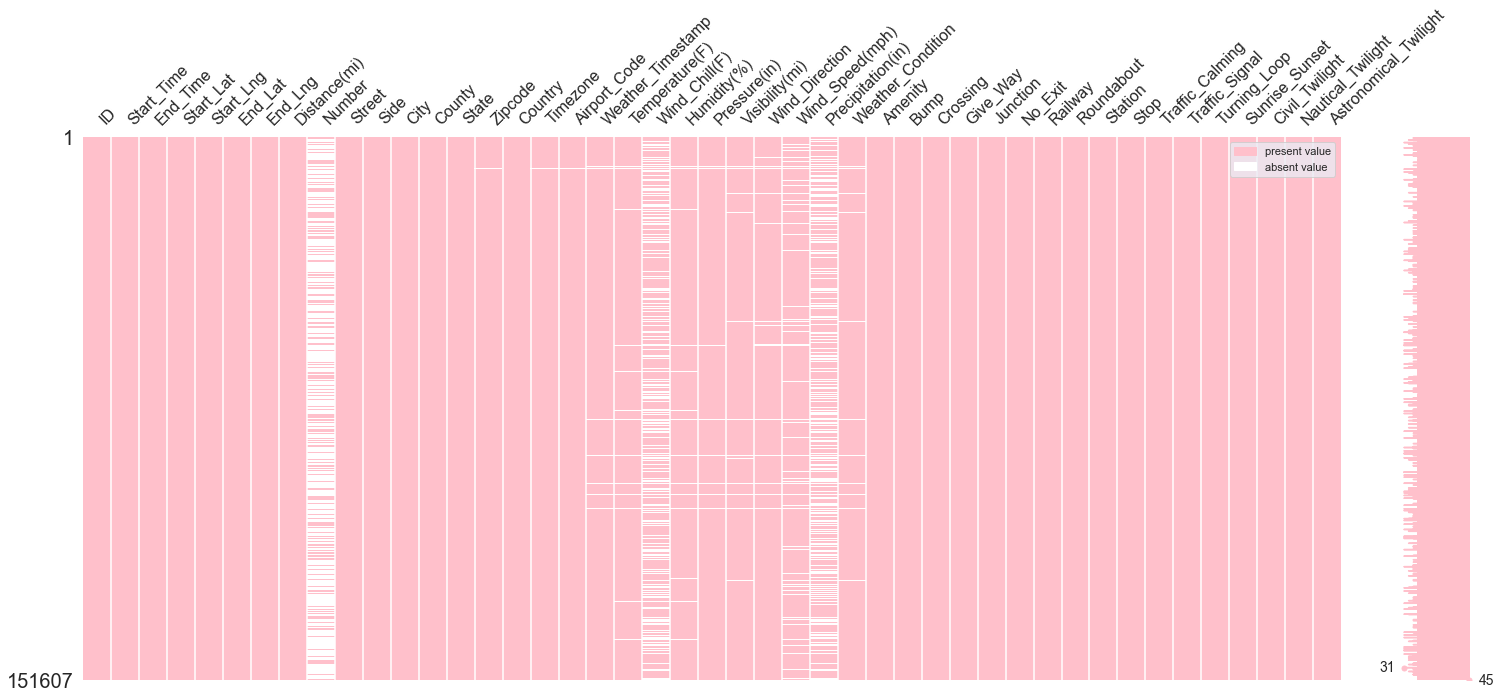

In [5]:
from function import missing_percentage

# display missing values in descending
print("Missing values in TRAIN in ascending: \n", missing_percentage(train))

# visualize where the missing values are located
msno.matrix(test, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

Missing values in TEST in ascending: 
                         Total  Percent
Number                 104525    68.94
Precipitation(in)       50853    33.54
Wind_Chill(F)           44908    29.62
Wind_Speed(mph)         12895     8.51
Humidity(%)              4584     3.02
Visibility(mi)           4456     2.94
Weather_Condition        4433     2.92
Temperature(F)           4345     2.87
Wind_Direction           4195     2.77
Pressure(in)             3638     2.40
Weather_Timestamp        3013     1.99
Airport_Code              431     0.28
Timezone                  245     0.16
Zipcode                    82     0.05
Sunrise_Sunset              3      NaN
Civil_Twilight              3      NaN
Nautical_Twilight           3      NaN
Astronomical_Twilight       3      NaN
City                        3      NaN


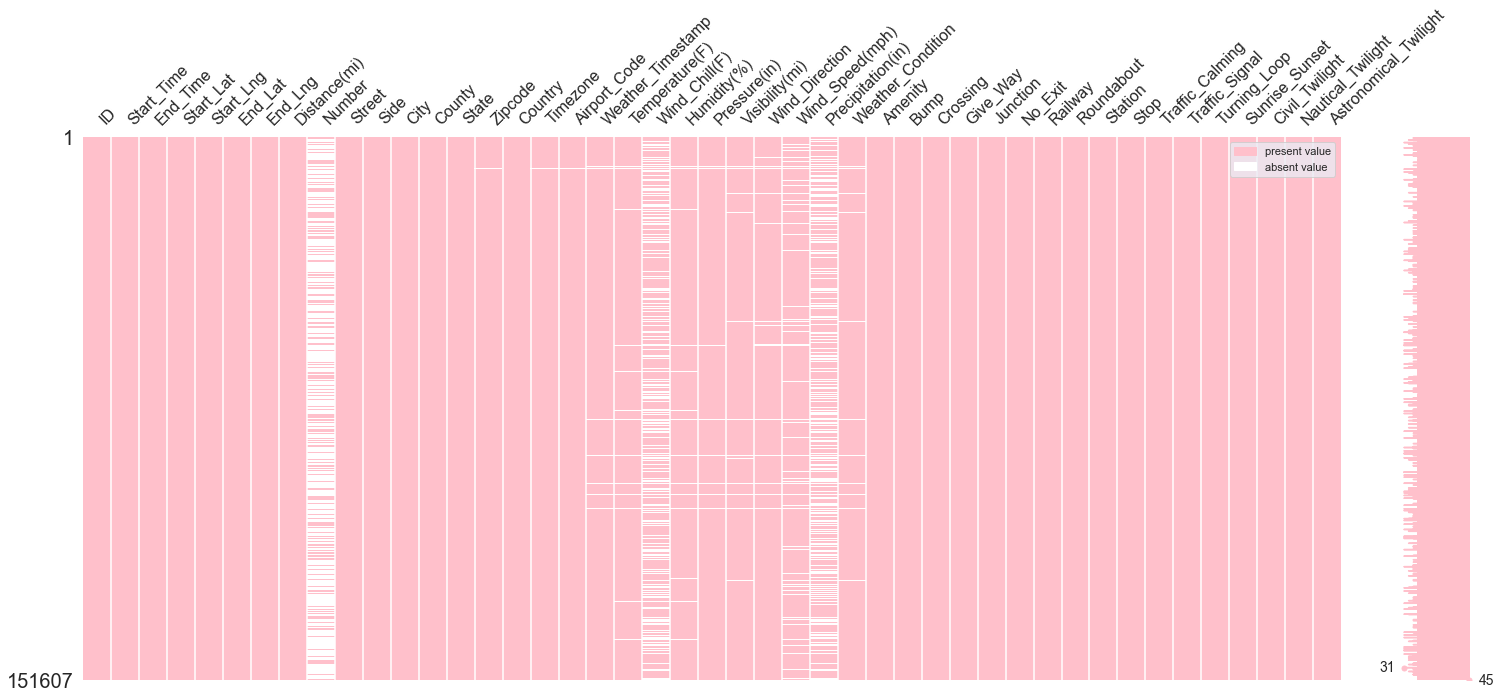

In [6]:
# display missing values in descending
print("Missing values in TEST in ascending: \n", missing_percentage(test))

# visualize where the missing values are located
msno.matrix(test, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

Missing values in VALIDATION in ascending: 
                         Total  Percent
Number                 104815    69.14
Precipitation(in)       51332    33.86
Wind_Chill(F)           45147    29.78
Wind_Speed(mph)         12977     8.56
Humidity(%)              4545     3.00
Visibility(mi)           4467     2.95
Weather_Condition        4443     2.93
Temperature(F)           4312     2.84
Wind_Direction           4203     2.77
Pressure(in)             3641     2.40
Weather_Timestamp        3050     2.01
Airport_Code              428     0.28
Timezone                  240     0.16
Zipcode                    99     0.07
Sunrise_Sunset             13     0.01
Civil_Twilight             13     0.01
Nautical_Twilight          13     0.01
Astronomical_Twilight      13     0.01
City                       13     0.01


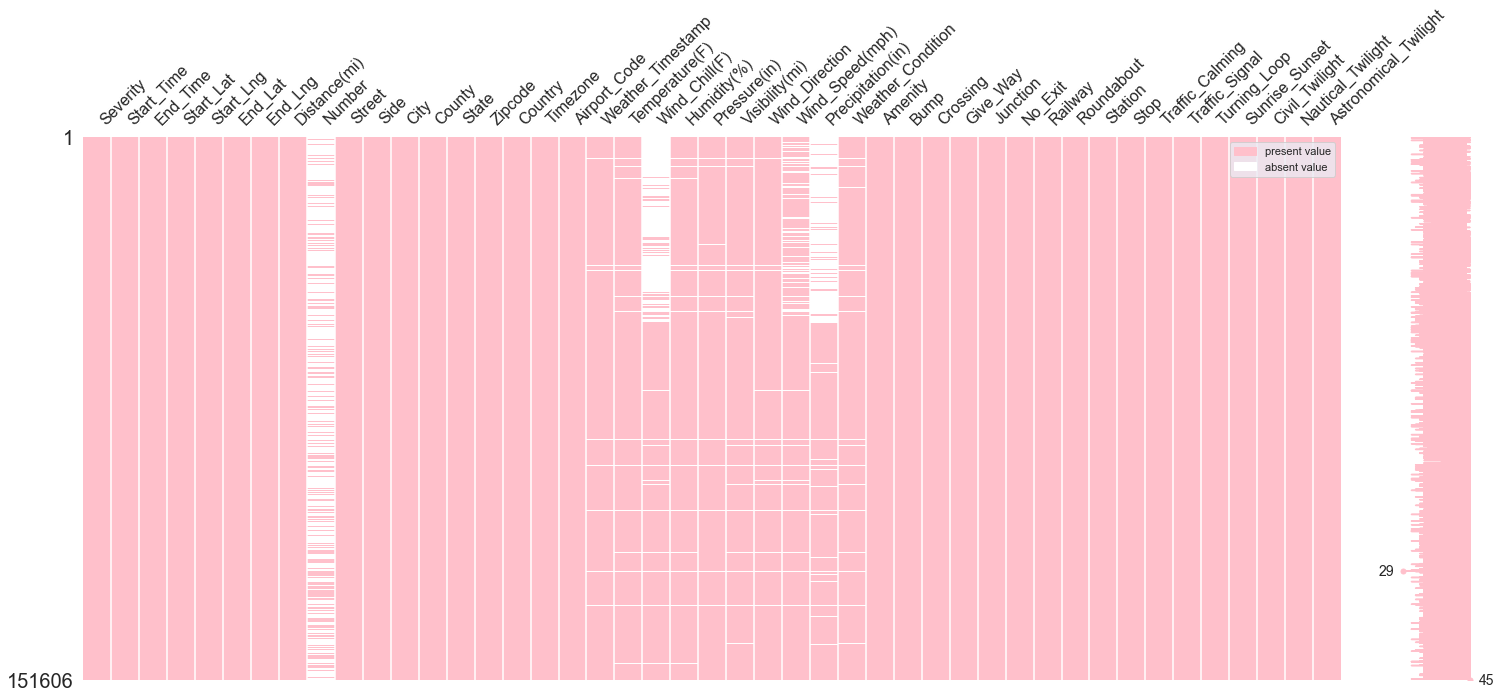

In [7]:
# display missing values in descending
print("Missing values in VALIDATION in ascending: \n", missing_percentage(validation))

# visualize where the missing values are located
msno.matrix(validation, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION

<hr>

+ Only a few missing values of the dataframes suggests that it MIGHT be missing completely at random due to a small number of missing values.

> Sunrise_Sunset: 3

> Civil_Twilight: 3

> Nautical_Twilight: 3

> Astronomical_Twilight: 3

> City: 3

#### I'm going to delete any missing column that IS COMPLETELY AT RANDOM (MCAR) AND has small number of missing values.
#### From the graph, I can see a strong correlation the strong correlation between `Number`, `Wind Chill(F)` and `Precipitation(in)`.


<hr>

<a id="2.3.2"></a>
### 2.3.2 Drop missing values pairwise for train and validation set by deleting their rows

In [8]:
# Pairwise delete the rows 
train.dropna(subset=['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'City'], how='any', inplace=True)

validation.dropna(subset=['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'City'], how='any', inplace=True)

<a id="2.3.3"></a>
### 2.3.3 Drop missing values listwise for all the datasets by deleting their columns

In [9]:
# print out list of country types 
print("Number of categories in Country column - TRAIN:", train.Country.nunique())
print("Categories in TRAIN:", train.Country.unique())

print("Number of categories in Country column - TEST:", test.Country.nunique())
print("Categories in TEST:", test.Country.unique())

print("Number of categories in Country column - VALIDATION:", validation.Country.nunique())
print("Categories in VALIDATION:", validation.Country.unique())

Number of categories in Country column - TRAIN: 1
Categories in TRAIN: <StringArray>
['US']
Length: 1, dtype: string
Number of categories in Country column - TEST: 1
Categories in TEST: <StringArray>
['US']
Length: 1, dtype: string
Number of categories in Country column - VALIDATION: 1
Categories in VALIDATION: <StringArray>
['US']
Length: 1, dtype: string


In [10]:
# print out list of Turning_Loop types 
print("Number of categories:", train.Turning_Loop.nunique())
print("Categories:", train.Turning_Loop.unique())

Number of categories: 1
Categories: <BooleanArray>
[False]
Length: 1, dtype: boolean


In [11]:
# print out list of Street types 
print(f'NUMBER OF CATEGORIES: {train.Street.nunique()}; \nUNIQUE NAMES OF THE CATEGORIES {train.Street.unique()}\n\n')

NUMBER OF CATEGORIES: 53871; 
UNIQUE NAMES OF THE CATEGORIES <StringArray>
[          'US-50 E',            'I-77 N',    'State Route 32',
       'Outerbelt W',           'US-33 S',       'North Fwy N',
            'I-75 S',            'I-70 E',           'I-675 S',
     ' Long Lake Ln',
 ...
 'Dan Brown Hill Rd',   ' Terry Park Cir', ' Hayne Stretch Rd',
    ' Radebaugh Way', ' Marshall Park Ln',    'Point Lobos St',
     'Jennie Lee Ln',     'Sangertown Sq',     ' Kendrick Ave',
      'NFS Road 104']
Length: 53871, dtype: string




### ----------> OBSERVAITON:

<hr>

> Remove the `Country` and `Turning_Loop` have a constant value with single categorical value that can be dropped becasue I couldn't compute the covariance with them

> `Number` has 64% of missing data and too much missing values (>60%) can be removed as this would not be used for analysis. 

> `Street` has 53871 unique values which is not meaningful for my further model prediction and have too much missing values (>60%).

> `Precipitation(in)` has 57% of missing data but this one is a key factor for rain/snow so can be recovered with these feature columns but the preciptation must be changed to categorical value. 

> `Wind_Chill(F)` the percentage of missing data is 53%, considering the fact of this feature, this can also be removed.

> `Street` shows the street number in address field which too specific for the prediction and have.

<hr>

In [12]:
# drop listwise columns for all datasets
train = train.drop(labels=['Street', 'Turning_Loop', 'Country', 'Number', 'Wind_Chill(F)'], axis=1)
test = test.drop(labels=['Street', 'Turning_Loop', 'Country', 'Number', 'Wind_Chill(F)'], axis=1)
validation = validation.drop(labels=['Street', 'Turning_Loop', 'Country', 'Number', 'Wind_Chill(F)'], axis=1)

<a id="2.3.4"></a>
### 2.3.4 [Interpolate() - Nearest Value imputation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

+ I've sorted all data frames by their `End_Time`, now I only need to fill `na` based on the corresponding `Weather_Timestamp` in the previous row. 

+ I could not sort the test data set by the `End_time` since it would mess up my Kaggle result. Moreover, `Weather_Timestamp` approximately equal to `Start_Time` and `Start_Time` has no missing value; I'll fill na in `Weather_Timestamp` with `Start_Time` in the test dataset

In [13]:
# Interpolate the NaNs with nearest value for Weather_Timestamp column
train.Weather_Timestamp.interpolate(method='ffill', inplace=True)
test['Weather_Timestamp'] = test['Weather_Timestamp'].fillna(test['Start_Time'])
validation.Weather_Timestamp.interpolate(method='ffill', inplace=True)

<a id="2.3.5"></a>
### 2.3.5 Median & Frequent Categorical Imputation for Weather Continuous features

Continuous weather features with missing values:

1. Temperature(F)

2. Humidity(%)

3. Pressure(in)

4. Visibility(mi)

5. Wind_Speed(mph)

`apply` + `pd.to_numeric` + `mask` + `fillna`

**According to the [A Countrywide Traffic Accident Dataset](https://arxiv.org/abs/1906.05409):**
"Weather Underground API to obtain weather information for each accident. Raw weather data was collected from 1,977 **weather stations located in airports** all around the United States."

+ Grouped by location and time. 'Airport_Code' is selected as a location feature because the sources of weather data are airport-based weather stations. 

+ Then, the data will be grouped by 'Start_Month' rather than 'Start_Hour' because using the former is computationally cheaper and remains less missing values. Finally, missing values will be replaced by a median value of each group. 

### Splitting up the timming in all dataframes

In [14]:
# slice the column to get the year, month, date
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

def get_hours(df, column):
    return df[column].apply(lambda date: date[11:13])

# TRAIN
train['Start_Time_Month'] = get_months(train, 'Start_Time')
train['Start_Time_Year'] = get_years(train, 'Start_Time')
train['Start_Time_Hour'] = get_hours(train, 'Start_Time')

train['End_Time_Month'] = get_months(train, 'End_Time')
train['End_Time_Year'] = get_years(train, 'End_Time')
train['End_Time_Hour'] = get_hours(train, 'End_Time')

train['Weather_Timestamp_Month'] = get_months(train, 'Weather_Timestamp')
train['Weather_Timestamp_Year'] = get_years(train, 'Weather_Timestamp')
train['Weather_Time_Hour'] = get_hours(train, 'Weather_Timestamp')

# TEST
test['Start_Time_Month'] = get_months(test, 'Start_Time')
test['Start_Time_Year'] = get_years(test, 'Start_Time')
test['Start_Time_Hour'] = get_hours(test, 'Start_Time')

test['End_Time_Month'] = get_months(test, 'End_Time')
test['End_Time_Year'] = get_years(test, 'End_Time')
test['End_Time_Hour'] = get_hours(test, 'End_Time')

test['Weather_Timestamp_Month'] = get_months(test, 'Weather_Timestamp')
test['Weather_Timestamp_Year'] = get_years(test, 'Weather_Timestamp')
test['Weather_Time_Hour'] = get_hours(test, 'Weather_Timestamp')

# VALIDATION
validation['Start_Time_Month'] = get_months(validation, 'Start_Time')
validation['Start_Time_Year'] = get_years(validation, 'Start_Time')
validation['Start_Time_Hour'] = get_hours(validation, 'Start_Time')

validation['End_Time_Month'] = get_months(validation, 'End_Time')
validation['End_Time_Year'] = get_years(validation, 'End_Time')
validation['End_Time_Hour'] = get_hours(validation, 'End_Time')

validation['Weather_Timestamp_Month'] = get_months(validation, 'Weather_Timestamp')
validation['Weather_Timestamp_Year'] = get_years(validation, 'Weather_Timestamp')
validation['Weather_Time_Hour'] = get_hours(validation, 'Weather_Timestamp')

# Drop original columns
train = train.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)
test = test.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)
validation = validation.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)

In [15]:
train.head(3)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_Month,Start_Time_Year,Start_Time_Hour,End_Time_Month,End_Time_Year,End_Time_Hour,Weather_Timestamp_Month,Weather_Timestamp_Year,Weather_Time_Hour
377127,2,39.10148,-84.52341,39.09841,-84.52241,0.219,R,Cincinnati,Hamilton,OH,45202,US/Eastern,KLUK,36.0,97,29.7,10.0,Calm,<NA>,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,Night,Night,Night,Day,02,2016,06,02,2016,12,02,2016,05
108963,2,41.06213,-81.53784,41.06217,-81.53547,0.123,R,Akron,Summit,OH,44311,US/Eastern,KAKR,39.0,55,29.65,10.0,Calm,<NA>,<NA>,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,02,2016,06,02,2016,12,02,2016,06
410084,2,39.06324,-84.03243,39.06731,-84.05851,1.427,R,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,35.6,100,29.66,10.0,WSW,8.1,<NA>,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,02,2016,08,02,2016,14,02,2016,08


In [16]:
%time
from collections import Counter

def fill_mode_wind_direction(df):
    # grouping data to fill NAs with majority value
    df['Wind_Direction'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month', 'Start_Time_Hour'])['Wind_Direction'].apply(
        lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull()) == False else x)
    print('Wind_Direction' + " fill type 1 for Nan : " + df['Wind_Direction'].isnull().sum().astype(str))
    
    df['Wind_Direction'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month'])['Wind_Direction'].apply(
        lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull()) == False else x)
    print('Wind_Direction' + " fill type 2 for Nan : " + df['Wind_Direction'].isnull().sum().astype(str))
    
    df['Wind_Direction'] = df.groupby(['Airport_Code', 'Start_Time_Month'])['Wind_Direction'].apply(
        lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull()) == False else x)
    print('Wind_Direction' + " fill type 3 for Nan : " + df['Wind_Direction'].isnull().sum().astype(str))

fill_mode_wind_direction(train)
fill_mode_wind_direction(test)
fill_mode_wind_direction(validation)

Wall time: 0 ns
Wind_Direction fill type 1 for Nan : 10311
Wind_Direction fill type 2 for Nan : 8585
Wind_Direction fill type 3 for Nan : 7758
Wind_Direction fill type 1 for Nan : 3684
Wind_Direction fill type 2 for Nan : 2968
Wind_Direction fill type 3 for Nan : 2652
Wind_Direction fill type 1 for Nan : 3644
Wind_Direction fill type 2 for Nan : 2945
Wind_Direction fill type 3 for Nan : 2678


### -------------> OBSERVATION
<hr>

> There still are some missing values in `Wind_Direction` but much less. Impute median by these features for the sake of simplicity.

<hr>

<a id="2.3.6"></a>
### 2.3.6 Impute Median and Mode for the rest- assume that there is random order of missing values 

In [17]:
# select numeric columns
numeric = train.select_dtypes(include=[np.number])
train_numeric = numeric.columns.tolist()

numeric = validation.select_dtypes(include=[np.number])
validation_numeric = numeric.columns.tolist()

numeric = test.select_dtypes(include=[np.number])
test_numeric = numeric.columns.tolist()

def impute_median_num_col(df, numeric_col):
    # Imputes mode to NAN to the rest of categorical columns 
    for column in numeric_col:
        df[column].fillna(df[column].median(), inplace=True)

impute_median_num_col(train, train_numeric)
impute_median_num_col(test, test_numeric)
impute_median_num_col(validation, validation_numeric)

# select non-numeric columns
train_string = train.select_dtypes(include='string')
test_string = test.select_dtypes(include='string')
validation_string = validation.select_dtypes(include='string')

def impute_mode_num_col(df, string_col):
    # Imputes mode to NAN to the rest of categorical columns 
    for column in string_col:
        df[column].fillna(df[column].mode()[0], inplace=True)

impute_mode_num_col(train, train_string)
impute_mode_num_col(test, test_string)
impute_mode_num_col(validation, validation_string)

# display missing values in descending
missing_percentage(train)

,Total,Percent


<br><br>
<a id="2.4"></a>
# 2.4 Shorten and Simplify categories 

<a id="2.4.1"></a>
### 2.4.1 Time-series columns - break them down into hour, minute, and weekday 

### Number of accidents for hour

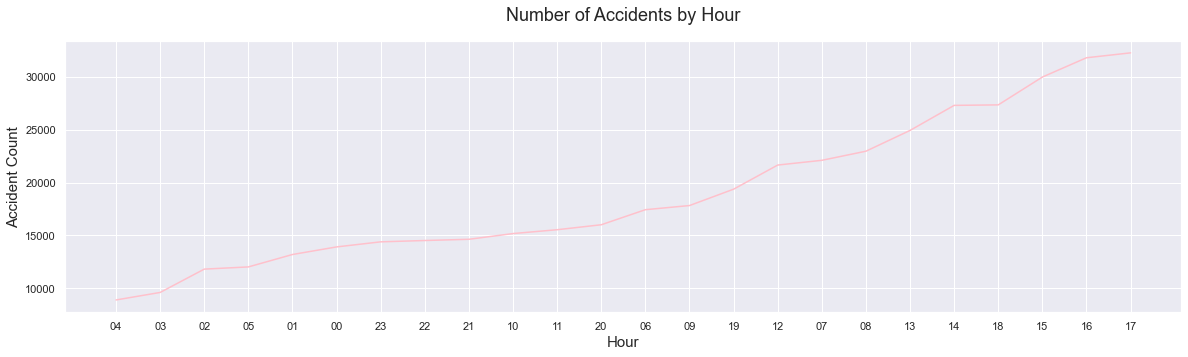

In [18]:
# get the accident count for each hour
df_hour = train['Start_Time_Hour'].value_counts().to_frame().reset_index().sort_values('Start_Time_Hour')
df_hour.columns = ['Hour', 'Counts']

# set fig size
plt.figure(figsize=(20, 5))
#set grid style
sns.set_style("darkgrid")
# crete a line plot for accident count for each hours as a time series
sns.lineplot(x='Hour', y='Counts', data=df_hour, color='pink')
# set label, ticks and title
plt.xticks(df_hour['Hour'])
plt.ylabel('Accident Count', size=15)
plt.xlabel('Hour', size=15)
plt.title('Number of Accidents by Hour', size=18, y=1.05)
# show graph
plt.show()

### ---------> OBSERVATION
> + The maximum number of accidents have taken place at around 4-5P.M, and a relatively high has taken place from 7–8 AM. This can result from the rush hour that most people come to and back to work, school, and home.

### Number of accidents for Month

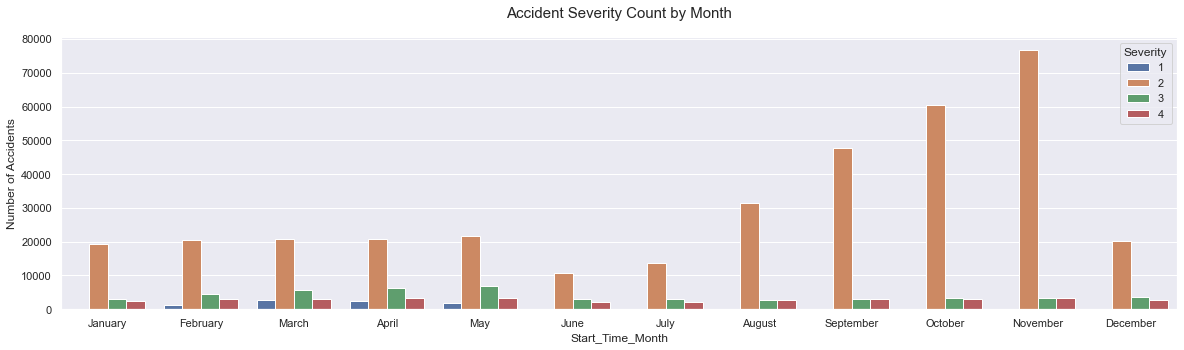

In [19]:
# import calendar for getting the month and week names
import calendar

# define the plot size
plt.figure(figsize=(20, 5))

# create count plot for severity for each month
sns.countplot(x='Start_Time_Month', hue='Severity', data=train)

# set itle, labels and ticks
plt.title('Accident Severity Count by Month', size=15, y=1.05)
plt.ylabel("Number of Accidents")
plt.xticks(np.arange(0, 12, 1), calendar.month_name[1:13])

#show plot
plt.show()

### ---------> OBSERVATION
> Surprisingly, significantly higher accident cases were recorded from September to November, but the more severe impact on traffic happens around February to May.

### Number of accidents for Year

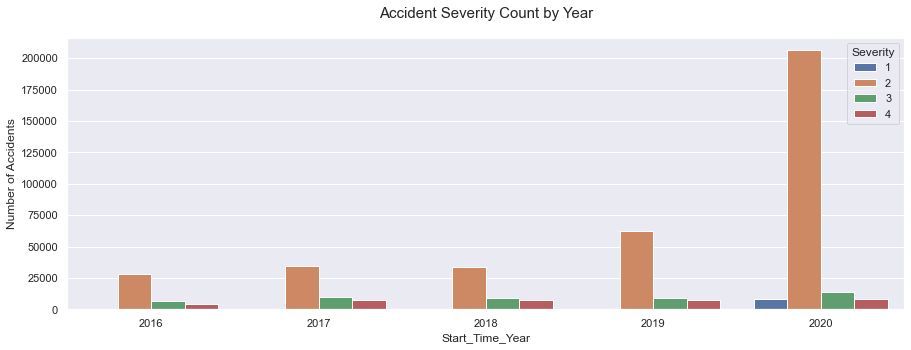

In [20]:
# define the figure size
plt.figure(figsize=(15, 5))

# create count plot for severity for each year
sns.countplot(x='Start_Time_Year', hue='Severity', data=train)

# set the ticks, labels and title
plt.title('Accident Severity Count by Year', size=15, y=1.05)
plt.ylabel("Number of Accidents")

# show plot
plt.show()

### ---------> OBSERVATION
> The year with the most accidents is 2020, while we have a frequency of accidents approximately fewer than 12.5 times in 2016.

<a id="2.4.2"></a>
### 2.4.2 Shorten & Simplify the Wind Direction

In [21]:
train.Wind_Direction.value_counts()

CALM        70228
Calm        23944
WNW         23497
NW          22910
W           21961
SSW         20986
WSW         20824
NNW         20557
S           20457
SW          19755
SSE         19628
SE          16648
N           16319
E           15810
ESE         15571
ENE         15298
NE          14702
NNE         14056
VAR         12326
West        12240
South       12144
North       10753
East         7239
Variable     6943
Name: Wind_Direction, dtype: Int64

In [22]:
def simplify_wind_direction(df):
    df.loc[df['Wind_Direction'] == 'Calm', 'Wind_Direction'] = 'CALM'
    df.loc[(df['Wind_Direction'] == 'West') | (df['Wind_Direction'] == 'WSW') | (
            df['Wind_Direction'] == 'WNW'), 'Wind_Direction'] = 'W'
    df.loc[(df['Wind_Direction'] == 'South') | (df['Wind_Direction'] == 'SSW') | (
            df['Wind_Direction'] == 'SSE'), 'Wind_Direction'] = 'S'
    df.loc[(df['Wind_Direction'] == 'North') | (df['Wind_Direction'] == 'NNW') | (
            df['Wind_Direction'] == 'NNE'), 'Wind_Direction'] = 'N'
    df.loc[(df['Wind_Direction'] == 'East') | (df['Wind_Direction'] == 'ESE') | (
            df['Wind_Direction'] == 'ENE'), 'Wind_Direction'] = 'E'
    df.loc[df['Wind_Direction'] == 'Variable', 'Wind_Direction'] = 'VAR'
    print("Wind Direction after simplification: ", df['Wind_Direction'].unique())


simplify_wind_direction(train)
simplify_wind_direction(test)
simplify_wind_direction(validation)

Wind Direction after simplification:  <StringArray>
['CALM', 'W', 'SW', 'NW', 'N', 'S', 'E', 'VAR', 'SE', 'NE']
Length: 10, dtype: string
Wind Direction after simplification:  <StringArray>
['CALM', 'W', 'E', 'S', 'NW', 'N', 'SW', 'NE', 'SE', 'VAR']
Length: 10, dtype: string
Wind Direction after simplification:  <StringArray>
['W', 'CALM', 'N', 'NW', 'SE', 'S', 'E', 'SW', 'NE', 'VAR']
Length: 10, dtype: string


<a id="2.4.3"></a>
### 2.4.3 Shorten ad Simplify the Weather Condition

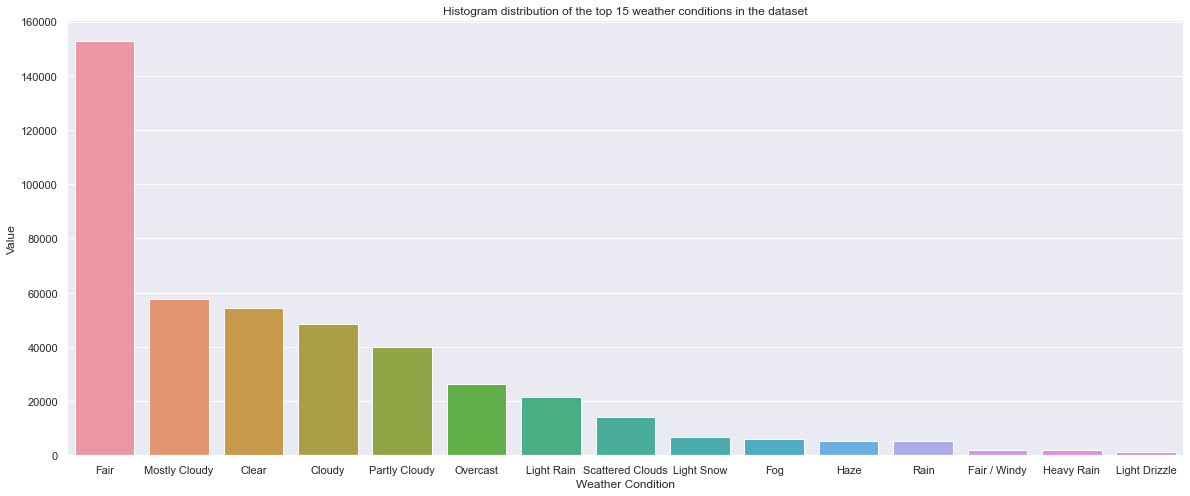

In [23]:
counts = train["Weather_Condition"].value_counts()[:15]
plt.figure(figsize=(20, 8))
plt.title("Histogram distribution of the top 15 weather conditions in the dataset")
sns.barplot(counts.index, counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Value")
plt.show()

### -----------> OBSERVATION
<hr>

> The most common weather condition is Fair, followed by Mostly Cloudy, and Overcast.

> According to Road Weather Management Program, most weather-related crashes happen on wet-pavement and during rainfall. Winter-condition and fog are another two main reasons for weather-related accidents. 

> To extract these three weather conditions, I simplify the 'Weather_Condition' Feature.

<hr>

In [24]:
train.Weather_Condition.value_counts()

Fair                            152815
Mostly Cloudy                    57681
Clear                            54287
Cloudy                           48247
Partly Cloudy                    40041
Overcast                         26284
Light Rain                       21610
Scattered Clouds                 14114
Light Snow                        6683
Fog                               5909
Haze                              5288
Rain                              5206
Fair / Windy                      1975
Heavy Rain                        1933
Light Drizzle                     1325
Smoke                             1130
Mostly Cloudy / Windy             1125
Cloudy / Windy                     978
Snow                               831
Partly Cloudy / Windy              638
Light Rain / Windy                 581
T-Storm                            463
Thunder in the Vicinity            386
Wintry Mix                         376
Light Rain with Thunder            350
Thunder                  

In [25]:
# Shorten weather conditions categories
def simplify_weather_condition(df):
    df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
    df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
    df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
    df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
    df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
    df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
    df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
    df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
    df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
    df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
    df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = "Unknown"

    print(df["Weather_Condition"].unique())

simplify_weather_condition(train)
simplify_weather_condition(test)
simplify_weather_condition(validation)

# print out the unique values in weather condition column for each dataset
train_unique_weather = train["Weather_Condition"].unique()
test_unique_weather = test["Weather_Condition"].unique()
validation_unique_weather = validation["Weather_Condition"].unique()

<StringArray>
[      'Cloudy',         'Snow',        'Clear',         'Rain',
          'Fog', 'Thunderstorm',        'Windy',         'Hail',
        'Smoke',         'Sand',      'Unknown',      'Tornado']
Length: 12, dtype: string
<StringArray>
[       'Clear',       'Cloudy',        'Windy',          'Fog',
         'Sand',         'Snow',         'Rain',        'Smoke',
         'Hail',      'Unknown', 'Thunderstorm']
Length: 11, dtype: string
<StringArray>
[      'Cloudy',         'Snow',        'Clear',         'Rain',
          'Fog',        'Smoke', 'Thunderstorm',         'Hail',
        'Windy',      'Unknown',         'Sand']
Length: 11, dtype: string


<br><br>
<a id="2.5"></a>
# 2.5 Typos
<a id="2.5.1"></a>
### 2.5.1 Check general spelling errors

In [26]:
train_string = train.select_dtypes(include='string')

# Check if spelling errors, should clean further if the number of before checking and after checking are different
for col in train_string:
    print(f'Before: {col}: {len(set(train[col]))}; After: {col}: {len(set(train[col].str.title().str.strip()))}')

Before: Side: 2; After: Side: 2
Before: City: 8887; After: City: 8854
Before: County: 1535; After: County: 1522
Before: State: 49; After: State: 49
Before: Zipcode: 83284; After: Zipcode: 83284
Before: Timezone: 4; After: Timezone: 4
Before: Airport_Code: 1884; After: Airport_Code: 1884
Before: Wind_Direction: 10; After: Wind_Direction: 10
Before: Weather_Condition: 12; After: Weather_Condition: 12
Before: Sunrise_Sunset: 2; After: Sunrise_Sunset: 2
Before: Civil_Twilight: 2; After: Civil_Twilight: 2
Before: Nautical_Twilight: 2; After: Nautical_Twilight: 2
Before: Astronomical_Twilight: 2; After: Astronomical_Twilight: 2


### ----------> OBSERVATION
<hr>

> Indeed, there are typos in the `Street`, `City`, `County`, `Wind_Direction`. Let's fix it.

<hr>

In [27]:
# Correct the errors
# train.Street = train.Street.str.title().str.strip()
train.City = train.City.str.title().str.strip()
train.County = train.County.str.title().str.strip()
train.Wind_Direction = train.Wind_Direction.str.title().str.strip()

# Correct the errors
# test.Street = test.Street.str.title().str.strip()
test.City = test.City.str.title().str.strip()
test.County = test.County.str.title().str.strip()
test.Wind_Direction = test.Wind_Direction.str.title().str.strip()

# validation.Street = validation.Street.str.title().str.strip()
validation.City = validation.City.str.title().str.strip()
validation.County = validation.County.str.title().str.strip()
validation.Wind_Direction = validation.Wind_Direction.str.title().str.strip()

In [28]:
# Check if spelling errors already fixed
for col in train_string:
    print(f'Before: {col}: {len(set(train[col]))}; After: {col}: {len(set(train[col].str.title().str.strip()))}')

Before: Side: 2; After: Side: 2
Before: City: 8854; After: City: 8854
Before: County: 1522; After: County: 1522
Before: State: 49; After: State: 49
Before: Zipcode: 83284; After: Zipcode: 83284
Before: Timezone: 4; After: Timezone: 4
Before: Airport_Code: 1884; After: Airport_Code: 1884
Before: Wind_Direction: 10; After: Wind_Direction: 10
Before: Weather_Condition: 12; After: Weather_Condition: 12
Before: Sunrise_Sunset: 2; After: Sunrise_Sunset: 2
Before: Civil_Twilight: 2; After: Civil_Twilight: 2
Before: Nautical_Twilight: 2; After: Nautical_Twilight: 2
Before: Astronomical_Twilight: 2; After: Astronomical_Twilight: 2


<a id="2.5.2"></a>
### 2.5.2 Extra-whitespaces
Check whether there are instances of extra whitespaces and trim them in all dataframes 

In [29]:
from function import whitespace_remover

"""
        Remove extra leading and tailing whitespace from the data.
         pass dataframe as a parameter and apply whitespace_remover function on dataframe
"""

whitespace_remover(train)
whitespace_remover(test)
whitespace_remover(validation)

<a id="2.5.3"></a>
### 2.5.3 Lower-case all values in each column

+ Categorical data should have all the uniform formatting - lower case. 
+ I will cast all categorical data to lower case except the test set since I dont want my ID columns to be in lower case to match the ID in Kaggle competition

In [30]:
# Cast all values inside the dataframe (except the columns' name) into lowercase
train = train.applymap(lambda s: s.lower() if type(s) == str else s)
# test = test.applymap(lambda s: s.lower() if type(s) == str else s) // I dont want my ID to be lower case to match the ID in Kaggle competition
validation = validation.applymap(lambda s: s.lower() if type(s) == str else s)

<br><br>
<a id="2.6"></a>
# 2.6 Sanity checks
Design and run a small test-suite, consisting of a series of sanity checks to test for the presence of **impossible values** and **outliers** for each attribute.
<a id="2.6.1"></a>
### 2.6.1 Check duplication
+ Use the pandas function `.drop_duplicates()` to remove copied rows from a DataFrame

+ Could not drop duplicated in TEST since I'll use it to compete in Kaggle learboard

In [31]:
# TRAIN
print("Number of rows before drop of duplicates  in TRAIN:", len(train.index))
print("Number of duplicated records in TRAIN: ", train.duplicated().sum())
train.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in TRAIN:", len(train.index), "\n\n")


# VALIDATION
print("Number of rows before drop of duplicates in VALIDATION:", len(validation.index))
print("Number of duplicated records in VALIDATION: ", validation.duplicated().sum())
validation.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in VALIDATION:", len(validation.index))

Number of rows before drop of duplicates  in TRAIN: 454796
Number of duplicated records in TRAIN:  15679
Number of rows after drop of duplicates in TRAIN: 439117 


Number of rows before drop of duplicates in VALIDATION: 151593
Number of duplicated records in VALIDATION:  1871
Number of rows after drop of duplicates in VALIDATION: 149722


<a id="2.6.2"></a>
### 2.6.2 Impossible values

In [32]:
train.describe().round(2)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00
mean,2.24,36.93,-98.73,36.93,-98.73,0.59,59.69,64.69,29.57,9.15,7.59,0.01
std,0.61,5.16,18.48,5.16,18.48,1.63,18.04,22.96,1.00,2.87,5.25,0.10
min,1.00,24.57,-124.50,24.57,-124.50,0.00,-89.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,33.86,-118.22,33.86,-118.22,0.00,48.00,49.00,29.47,10.00,4.60,0.00
50%,2.00,37.35,-94.53,37.36,-94.53,0.18,61.00,68.00,29.88,10.00,7.00,0.00
75%,2.00,40.73,-80.94,40.73,-80.94,0.59,73.00,84.00,30.04,10.00,10.00,0.00
max,4.00,49.00,-67.40,49.00,-67.40,150.14,168.80,100.00,38.94,120.00,518.00,24.00


### -----> OSERVATION

<hr>

> The **minimum value for `Pressure(in)`, `Visibility(mi)` is 0**, meaning that some records are missing them and replaced them by putting zeros. For this reason, I'm going to drop the records for these two columns for TRAIN and VALIDATION datasets

<hr>

In [33]:
# Drop rows that have Pressure and Visibility equal and below 0

train = train[train["Pressure(in)"] != 0]
train = train[train["Visibility(mi)"] != 0]

validation = validation[validation["Pressure(in)"] != 0]
validation = validation[validation["Visibility(mi)"] != 0]


print("TRAIN DATASET: ")
print(train[["Pressure(in)", "Visibility(mi)"]].describe().round(2))

print("VALIDATION DATASET: ")
print(validation[["Pressure(in)", "Visibility(mi)"]].describe().round(2))

TRAIN DATASET: 
       Pressure(in)  Visibility(mi)
count     438700.00       438700.00
mean          29.57            9.16
std            1.00            2.86
min            0.30            0.06
25%           29.47           10.00
50%           29.88           10.00
75%           30.04           10.00
max           38.94          120.00
VALIDATION DATASET: 
       Pressure(in)  Visibility(mi)
count     149582.00       149582.00
mean          29.57            9.16
std            1.00            2.89
min           19.89            0.06
25%           29.47           10.00
50%           29.88           10.00
75%           30.04           10.00
max           58.04          140.00


<br><br>
<a id="2.7"></a>
# 2.7 Extra exploration and visualization
<a id="2.7.1"></a>
### 2.7.1 Medium distance by severity

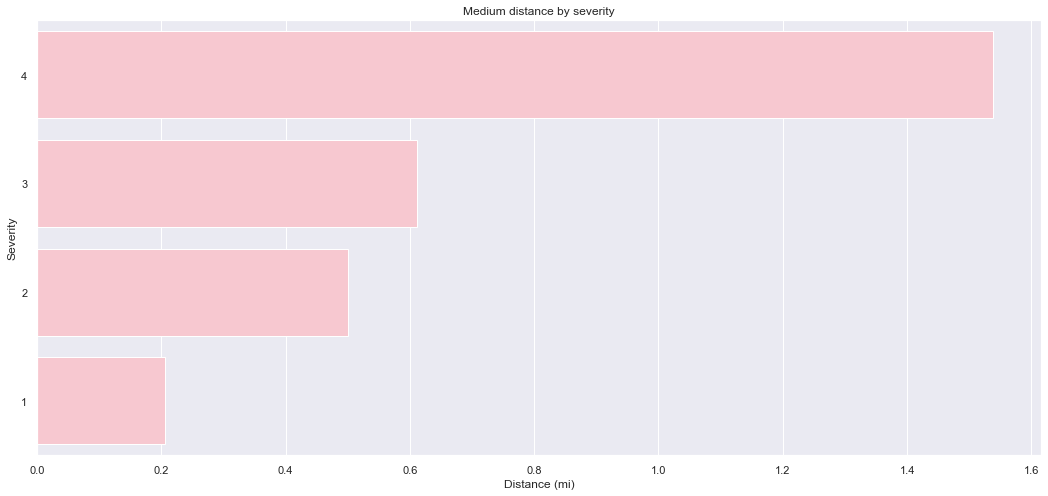

In [34]:
# bar charts for Medium distance by severity
severity_distance = train.groupby("Severity").mean()["Distance(mi)"].sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Medium distance by severity")
sns.barplot(severity_distance.values, severity_distance.index, orient="h", order=severity_distance.index, color='pink')
plt.xlabel("Distance (mi)")
plt.show()

### ------------> OBSERVATION

<hr>

> The graph shows the accident is more or less proportional to the severity

> The accidents with severity level of 4 have the longest distance. 

> The longer the distance, the more severe the accidents

<hr>

<a id="2.7.3"></a>
### 2.7.2 Top 10 states having the most accidents

Wall time: 0 ns


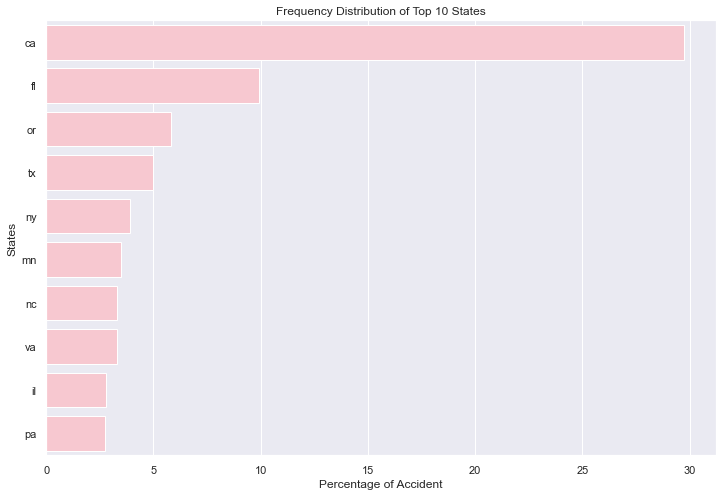

In [35]:
%time
# visualize top 10 states having the most accidents
state_percentage = train['State'].value_counts() * 100 / len(train)

# state_count
plt.figure(figsize=(12, 8))
sns.barplot(state_percentage.values[:10], state_percentage.index[:10], color='pink')
plt.title('Frequency Distribution of Top 10 States')

plt.ylabel('States', fontsize=12)
plt.xlabel('Percentage of Accident', fontsize=12)
plt.show()

### ----------> OBSERVATION
<hr>

> The state having the most number of accidents is California (28%) followed by Florida(10%).

<hr>

<a id="2.7.3"></a>
### 2.7.3 Longtitude and Latitude

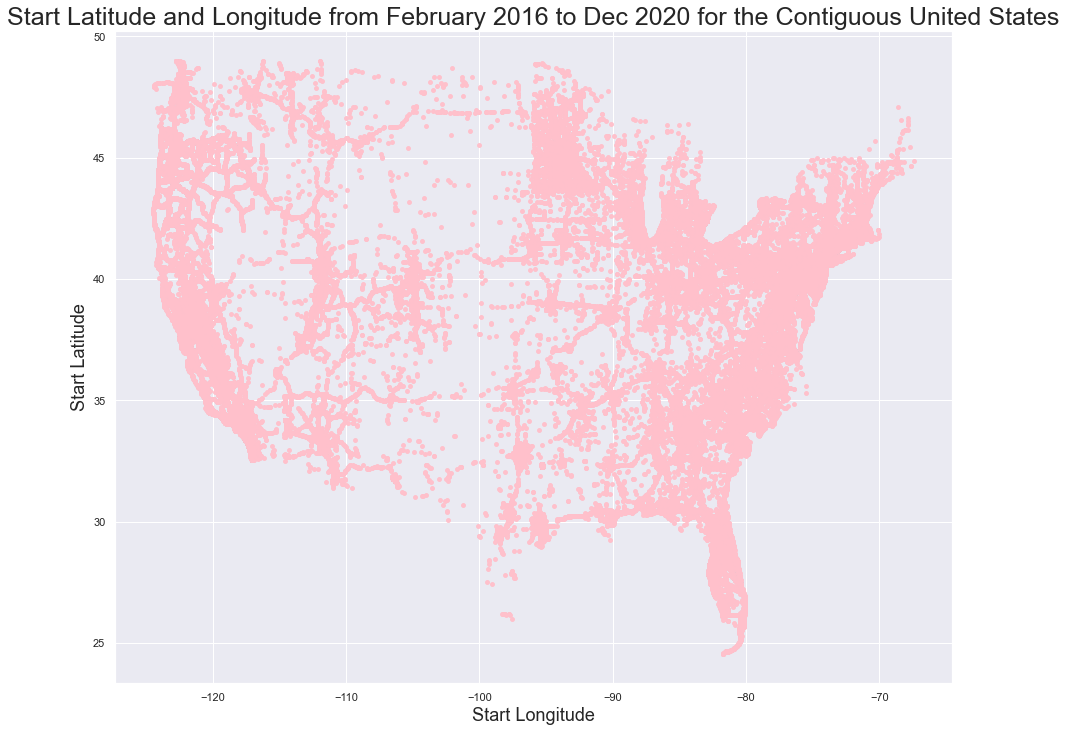

In [36]:
from matplotlib import pyplot as plt

# Make scatter for Latitude and Longitude
plt.figure(figsize=(15, 12))
plt.scatter(x=train.Start_Lng, y=train.Start_Lat, s=15, color='pink')
plt.title("Start Latitude and Longitude from February 2016 to Dec 2020 for the Contiguous United States", fontsize=25)
plt.xlabel("Start Longitude", fontsize=18)
plt.ylabel("Start Latitude", fontsize=18)
plt.show()

### ----------> OBSERVATION
<hr>

> The density of points is more at the eastern and western coasts than in the middle of the country, indicating that more accidents were recorded at the two sides from February 2016 to Dec 2020 in the Contiguous United States rather than its middle part.

<hr>

<a id="2.7.3"></a>
### 2.7.3 Most frequent POI Attributes of an accident with severity 

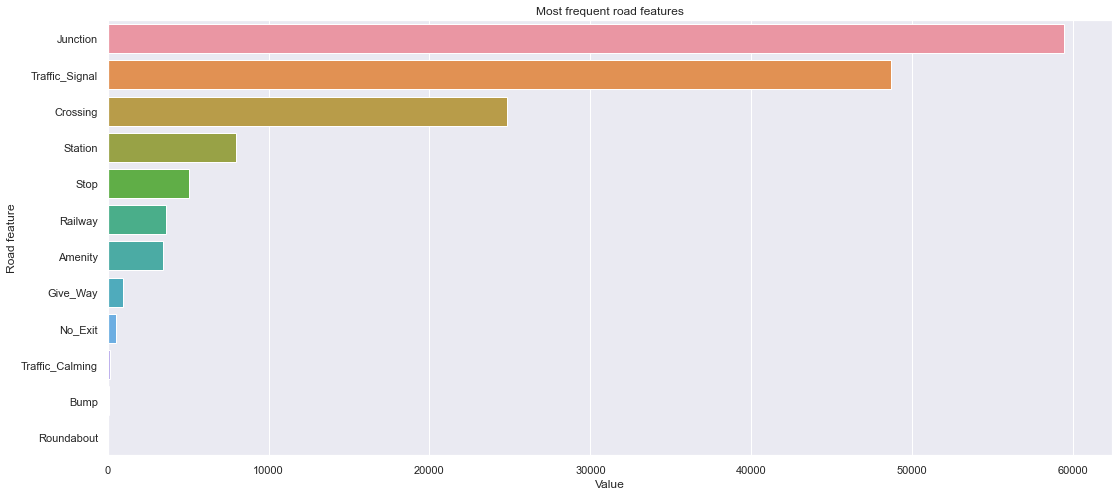

In [37]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station",
                 "Stop", "Traffic_Calming", "Traffic_Signal"]
data = train[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Most frequent road features")
sns.barplot(data.values, data.index, orient="h")
plt.xlabel("Value")
plt.ylabel("Road feature")
plt.show()

### ---------> OBSERVATION

<hr>

> Fatal accidents occurred near a traffic signal, junction and crossing were present. The driver might fail to pay attention before pulling out due to impatience, impairment of one form or another, or a simple failure to judge the distance and speed of an oncoming vehicle.

> The fourth most common road feature, instead, was the presence of a nearby station, probably because of the high presence of vehicles.

<hr>

### WRITING CLEANED DATA BACK TO FILES
After completing your analysis and adding new columns, I write the results back to cosc2789-2021 folder. Otherwise, the data will be lost when the Jupyter Lab shuts down.

In [38]:
# # To write the data from the data frame into a file, use the to_csv function.
# train.to_csv('cosc2789-2021/cleaned_train.csv', index=False)
# test.to_csv('cosc2789-2021/cleaned_test.csv', index=False)
# validation.to_csv('cosc2789-2021/cleaned_validation.csv', index=False)
# print("Cleaned data was successfully saved!")

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>3. Feature Engineering</strong></h1>

### Missing Values

In [39]:
print("Total missing values in TRAIN:", train.isna().sum().sum())
print("Total missing values in TEST:", test.isna().sum().sum())
print("Total missing values in VALIDATION:", validation.isna().sum().sum())

Total missing values in TRAIN: 0
Total missing values in TEST: 0
Total missing values in VALIDATION: 0


In [40]:
missing_percentage(train)

,Total,Percent


In [41]:
missing_percentage(test)

,Total,Percent


In [42]:
missing_percentage(validation)

,Total,Percent


<a id="3.1"></a>
### 3.1 Data Correlation - Quantify the association of features and accidents

To quantify the pairwise relationships, I compute the Pearson correlation coefficient matrix. 

0.2 = weak;
0.5 = medium;
0.8 = strong;
0.9 = very strong

In [43]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")
print (f"Validation has {validation.shape[0]} rows and {validation.shape[1]} columns")

Train has 438700 rows and 46 columns
Test has 151607 rows and 46 columns
Validation has 149582 rows and 46 columns


In [44]:
# gives us statistical info about the numerical variables. 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,438700.0,2.243615,0.612126,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,438700.0,36.924992,5.156410,24.570222,33.858560,37.354780,40.732080,49.000560
Start_Lng,438700.0,-98.719154,18.477496,-124.497567,-118.214156,-94.525898,-80.940801,-67.403551
End_Lat,438700.0,36.925070,5.156403,24.570110,33.858335,37.354760,40.732111,49.000760
End_Lng,438700.0,-98.719007,18.477345,-124.497478,-118.214103,-94.525877,-80.940395,-67.403550
Distance(mi),438700.0,0.586301,1.630518,0.000000,0.000000,0.178000,0.593000,150.138000
Temperature(F),438700.0,59.702897,18.043495,-89.000000,48.000000,61.000000,73.000000,168.800000
Humidity(%),438700.0,64.663488,22.951424,1.000000,49.000000,68.000000,84.000000,100.000000
Pressure(in),438700.0,29.568323,0.999707,0.300000,29.470000,29.880000,30.040000,38.940000
Visibility(mi),438700.0,9.161630,2.861522,0.060000,10.000000,10.000000,10.000000,120.000000


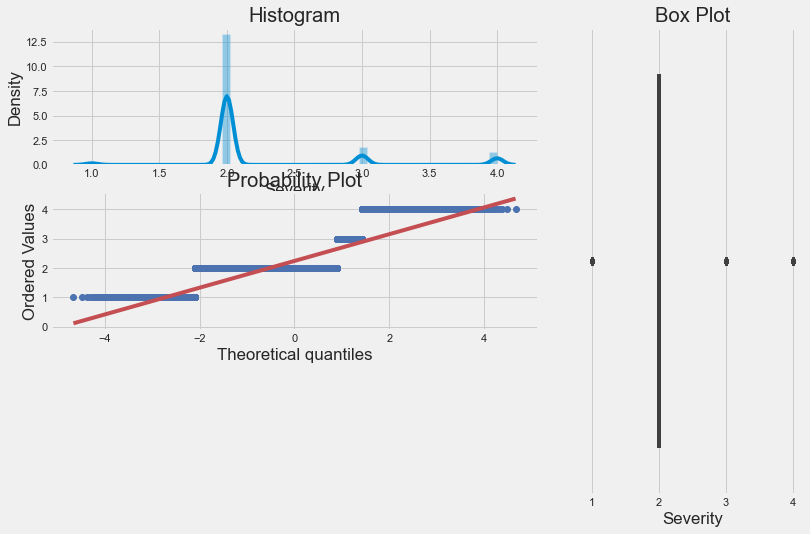

In [45]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train, 'Severity')

These **three** charts above can tell us a lot about our target variable.

> Our target variable, **Severity** is not normally distributed.

> Our target variable is right-skewed. 

> There are multiple outliers in the variable.

In [46]:
#skewness and kurtosis
print("Skewness: " + str(train['Severity'].skew()))
print("Kurtosis: " + str(train['Severity'].kurt()))

Skewness: 1.8136105304306374
Kurtosis: 2.79122020392118


### --------> OBSERVATION

<hr>

<b>Positive Skewness</b>

These **three** charts above can tell us a lot about our target variable. There are quite a bit Skewness and Kurtosis in the target variable. 

> Our target variable, **Severity** is not normally distributed and it is right-skewed. 

> There are multiple outliers in the variable.

> Similar to our target variable distribution means the mean and median will be greater than the mode similar to this dataset. Which means more more sever case by car accident than the average case.


<b>Kurtosis</b> 
> My target variable shows an unequal level of variance across most independent variables. This **Heteroscedasticity** is a red flag for the multiple linear regression model.

*In probability theory and statistics, **Kurtosis** is the measure of the outliers present in my distribution.*

> There are many outliers in the scatter plots above that took my attention. 


<hr>

In [47]:
numeric_feats = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Roundabout,156.106445
Precipitation(in),101.997493
Bump,79.718073
Traffic_Calming,59.940820
No_Exit,28.745465
Give_Way,21.545331
Distance(mi),20.740189
Amenity,11.151318
Railway,10.862580
Stop,9.126996


<a id="3.2"></a>
### 3.2 [Box Cox Transformation of (highly) skewed features](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html)
+ We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

+ Note that setting  λ=0  is equivalent to log1p used above for the target variable.

+ See this page for more details on Box Cox Transformation as well as the scipy function's page

In [48]:
# from scipy.special import boxcox1p

# # find skewness function
# def find_skewness(df):
#     numeric_feats = df.dtypes[df.dtypes != "object"].index
#     # Check the skew of all numerical features
#     skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#     print("\nSkew in numerical features: \n")
#     skewness = pd.DataFrame({'Skew' :skewed_feats})
#     return skewness

# def log_transform(df):
#     numeric_feats = df.dtypes[df.dtypes != "object"].index
#     # Check the skew of all numerical features
#     skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#     print("\nSkew in numerical features: \n")
#     skewness = pd.DataFrame({'Skew' :skewed_feats})
#     skewed_features = skewness[abs(skewness) > 0.75].index
#     for feat in skewed_features:
#         print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
#         df[feat] = np.log1p(df[feat])


# def boxcox_transform(df):
#     numeric_feats = df.dtypes[df.dtypes != "object"].index
#     # Check the skew of all numerical features
#     skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#     print("\nSkew in numerical features: \n")
#     skewness = pd.DataFrame({'Skew' :skewed_feats})
#     skewed_features = skewness[abs(skewness) > 0.75].index
#     for feat in skewed_features:
#         print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
#         df[feat] = boxcox1p(df[feat], 0.15)

# boxcox_transform(train)
# boxcox_transform(test)
# boxcox_transform(validation)

In [49]:
## Getting the correlation of all the features with target variable. 
(train.corr()**2)["Severity"].sort_values(ascending = False)[1:]

Start_Lng            3.396511e-02
End_Lng              3.396466e-02
Distance(mi)         2.444140e-02
End_Lat              5.683214e-03
Start_Lat            5.680420e-03
Wind_Speed(mph)      3.603532e-03
Pressure(in)         3.125942e-03
Crossing             3.034795e-03
Humidity(%)          2.437293e-03
Traffic_Signal       2.022418e-03
Junction             4.500038e-04
Temperature(F)       3.789488e-04
Station              1.217496e-04
Give_Way             4.180763e-05
Visibility(mi)       2.983816e-05
Railway              1.913345e-05
Bump                 1.229787e-05
Amenity              9.943897e-06
Precipitation(in)    9.772687e-06
No_Exit              1.122199e-06
Traffic_Calming      1.111709e-06
Stop                 1.101762e-07
Roundabout           5.011702e-08
Name: Severity, dtype: float64

### ---> OBSERVATION

> These are the predictor variables sorted in a descending order starting with the most correlated one **Start_Lng**. 

> The results showed that the parameters such as Start_Lng', 'Distance(mi)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)' were the most prominent factors which increase the severity of crashes.

<a id="3.3"></a>
### 3.3 Assumptions of Regression

* **Linearity ( Correct functional form )** 
* **Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity )**
* **Independence of Errors ( vs Autocorrelation )**
* **Multivariate Normality ( Normality of Errors )**
* **No or little Multicollinearity** 

> So, **How do I check regression assumptions? I fit a regression line and look for the variability of the response data along the regression line.** Let's apply this to each one of them.

> **Linearity(Correct functional form):** 
Linear regression needs the relationship between each independent variable and the dependent variable to be linear. The linearity assumption can be tested with scatter plots. The following two examples depict two cases, where no or little linearity is present. 

### Removing multicollinary columns

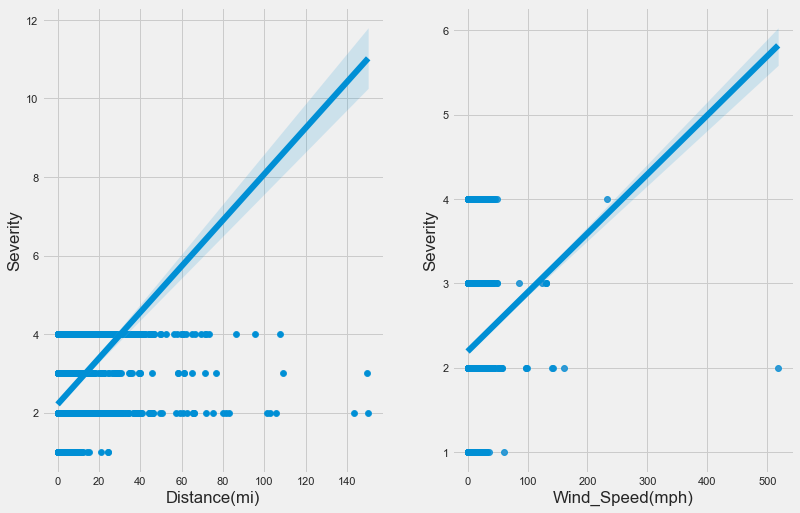

In [50]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
## Scatter plotting for Severity and Distance(mi).
sns.scatterplot( x = train['Distance(mi)'], y = train.Severity,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=train['Distance(mi)'], y=train.Severity, ax=ax1)

## Scatter plotting for Severity and ['Wind_Speed(mph)'].
sns.scatterplot(x = train['Wind_Speed(mph)'],y = train.Severity, ax=ax2, color='pink')
## regression line for MasVnrArea and Severity.
sns.regplot(x=train['Wind_Speed(mph)'], y=train.Severity, ax=ax2);

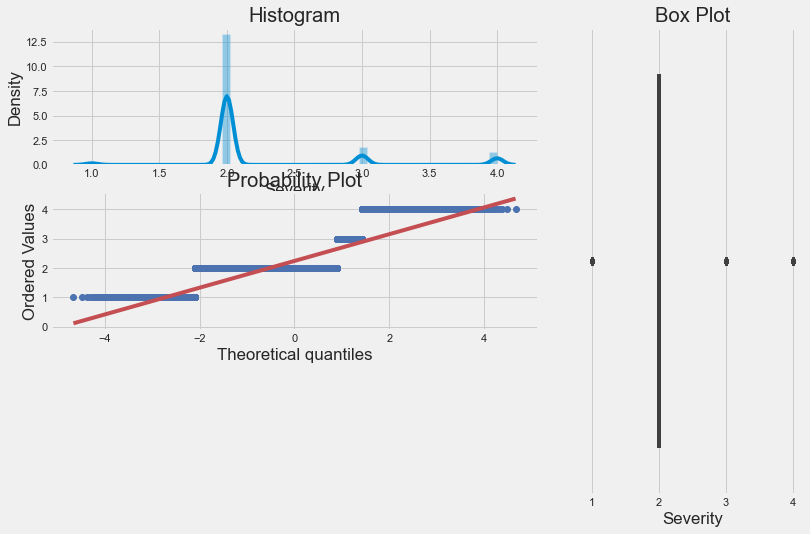

In [51]:
plotting_3_chart(train, 'Severity')

Now, let's make sure that the target variable follows a normal distribution. If you want to learn more about the probability plot(Q-Q plot), try [this](https://www.youtube.com/watch?v=smJBsZ4YQZw) video. You can also check out [this](https://www.youtube.com/watch?v=9IcaQwQkE9I) one if you have some extra time.

In [52]:
# ## transforming target variable using numpy.log1p,
# train["Severity"] = np.log1p(train["Severity"])
#
# ## Plotting the newly transformed response variable
# plotting_3_chart(train, 'Severity')

### ---------> Observation

<hr>

* There are multiple types of features including int, object, and float
* No feature have missing values. 

> I want to focus on the target variable which is **Severity.** Let's create a histogram to see **if the features are normally distributed**. This is one of the assumptions of multiple linear regression. 

<hr>


 mu = 2.24 and sigma = 0.61



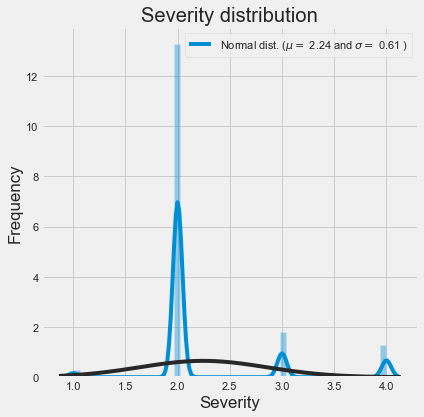

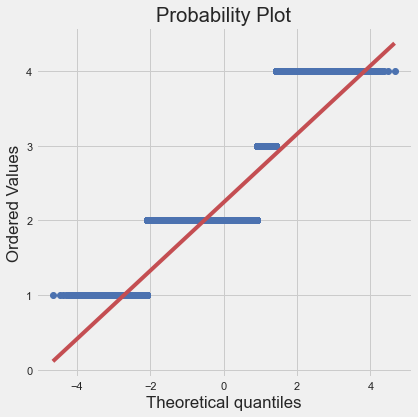

In [53]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(train['Severity'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Severity'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Severity distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Severity'], plot=plt)
plt.show()

As you can see, the log transformation removes the normality of errors, which solves most of the other errors we talked about above. Let's make a comparison of the pre-transformed and post-transformed state of residual plots. 

### ------> OBSERVATION
> Here, we see that the pre-transformed chart on the left has heteroscedasticity, and the post-transformed chart on the right has Homoscedasticity(almost an equal amount of variance across the zero lines). It looks like a blob of data points and doesn't seem to give away any relationships. That's the sort of relationship we would like to see to avoid some of these assumptions. 

### Data Correlation

As we look through these scatter plots, I realized that it is time to explain the assumptions of Multiple Linear Regression. Before building a multiple linear regression model, we need to check that these assumptions below are valid.

We can already see some potentially interesting relationships between the target variable (the number of fatal accidents) and the feature variables (the remaining three columns).

To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:

0.2 = weak
0.5 = medium
0.8 = strong
0.9 = very strong

In [54]:
train.describe() 

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000
mean,2.243615,36.924992,-98.719154,36.925070,-98.719007,0.586301,59.702897,64.663488,29.568323,9.161630,7.595461,0.005713
std,0.612126,5.156410,18.477496,5.156403,18.477345,1.630518,18.043495,22.951424,0.999707,2.861522,5.243357,0.104330
min,1.000000,24.570222,-124.497567,24.570110,-124.497478,0.000000,-89.000000,1.000000,0.300000,0.060000,0.000000,0.000000
25%,2.000000,33.858560,-118.214156,33.858335,-118.214103,0.000000,48.000000,49.000000,29.470000,10.000000,4.600000,0.000000
50%,2.000000,37.354780,-94.525898,37.354760,-94.525877,0.178000,61.000000,68.000000,29.880000,10.000000,7.000000,0.000000
75%,2.000000,40.732080,-80.940801,40.732111,-80.940395,0.593000,73.000000,84.000000,30.040000,10.000000,10.000000,0.000000
max,4.000000,49.000560,-67.403551,49.000760,-67.403550,150.138000,168.800000,100.000000,38.940000,120.000000,518.000000,24.000000


In [55]:
# compare severity level rate across numerical columns
pd.pivot_table(train, index = 'Severity', values = ['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'])

,Distance(mi),End_Lat,End_Lng,Humidity(%),Precipitation(in),Pressure(in),Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Wind_Speed(mph)
Severity,,,,,,,,,,,
1,0.205729,35.617272,-101.051957,49.897268,0.005023,29.022293,35.617058,-101.051787,71.219805,9.535951,8.377550
2,0.499811,36.785512,-100.343555,64.764718,0.005436,29.564639,36.785488,-100.343740,59.304122,9.127562,7.366809
3,0.611694,37.447182,-92.896021,64.313221,0.008278,29.585440,37.446907,-92.896050,61.666190,9.382665,8.777140
4,1.538834,37.948725,-89.538847,67.654801,0.005117,29.713476,37.948390,-89.538839,58.298382,9.112706,8.109144


**-----------> OBSERVATION**
> Diverse range of values for different features

> I might need to use scaling to unify the range of the features

## Multicollinearity of Features

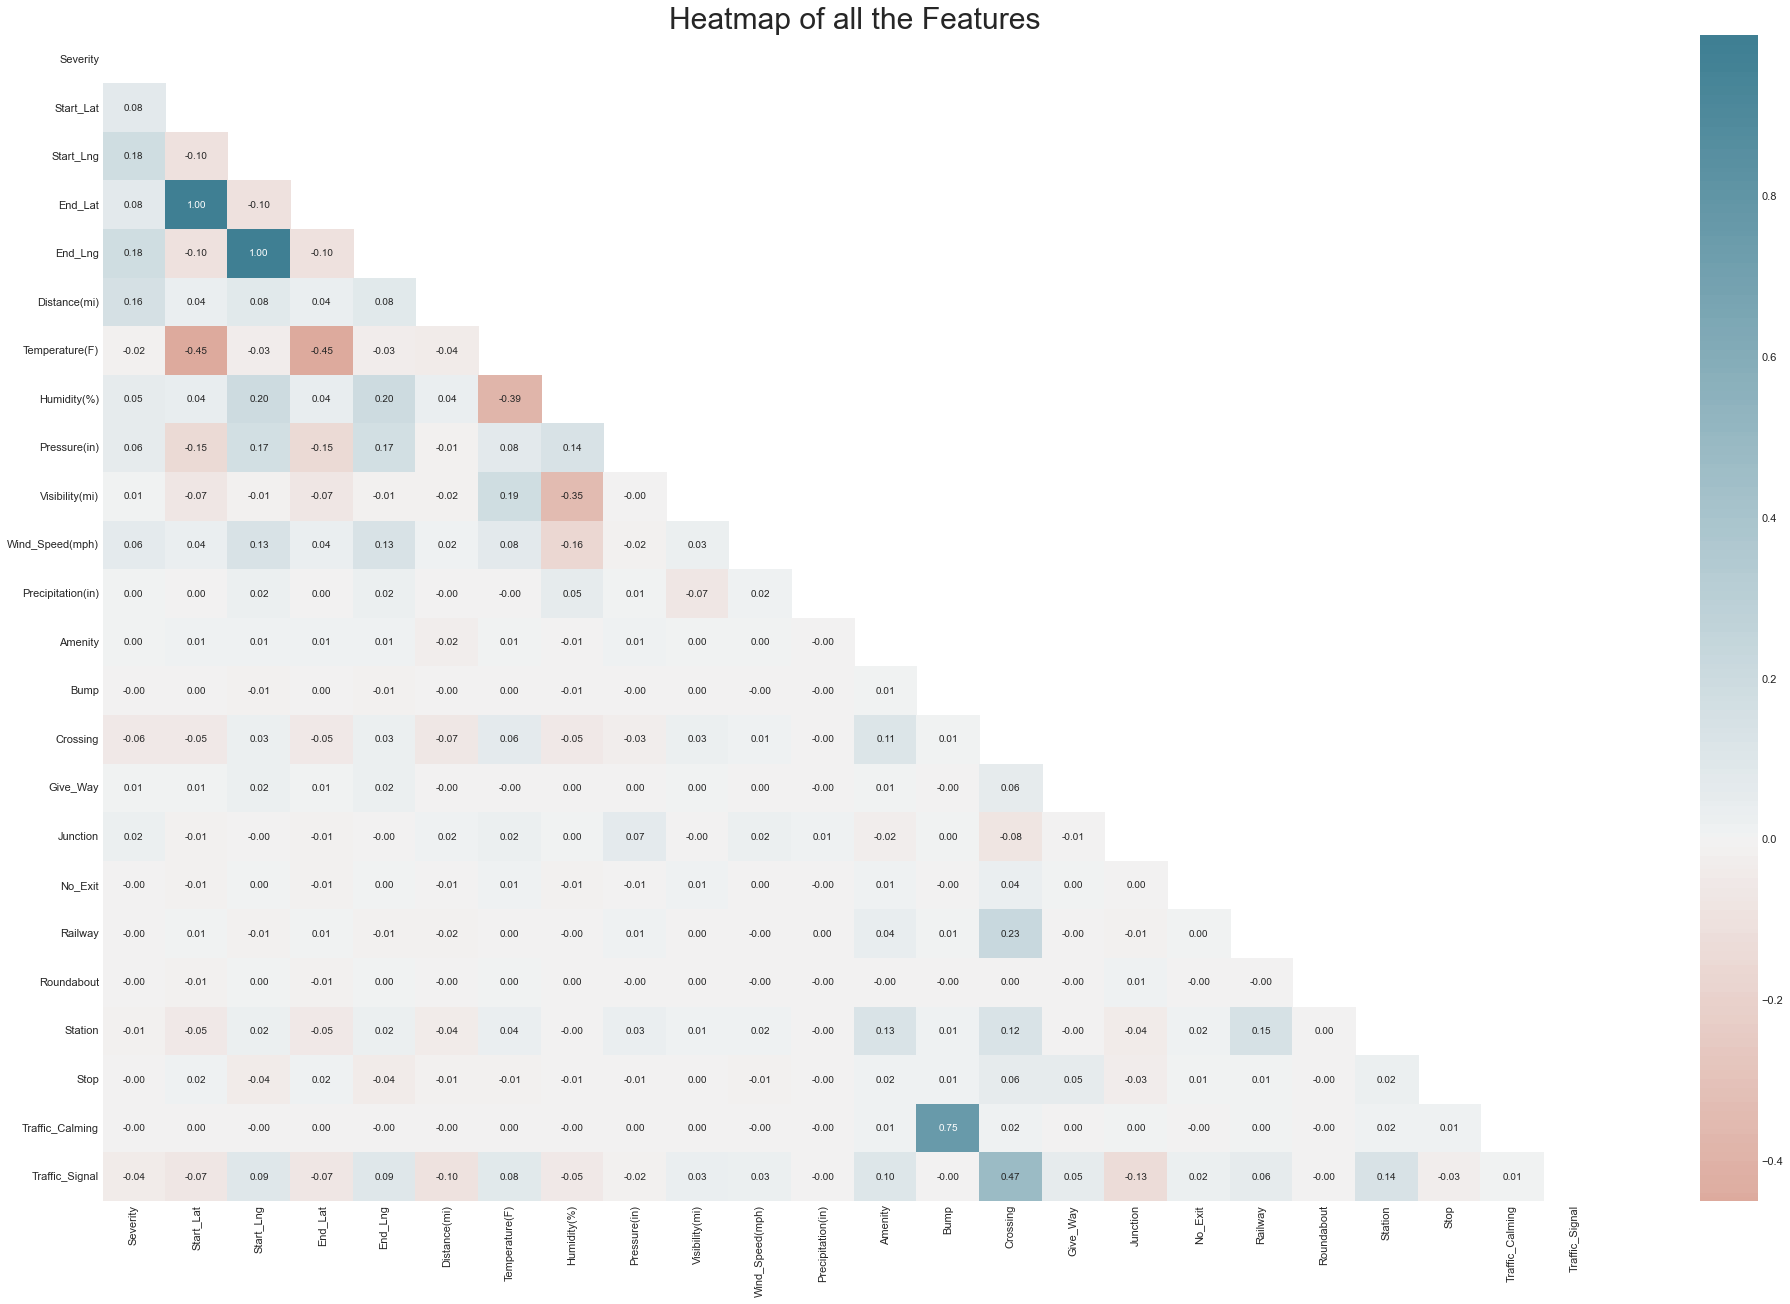

In [56]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x)

## Plot fig sizing. 
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True,
            fmt = ".2f",
            center = 0, 
           );

## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

### ---------> OBSERVATION
<hr>

+ From the matrix I can see that the start and end GPS coordinates of the accidents are highly correlated.

+ In fact, from the medium distance shown before, the end of the accident is usually close to the start, so I can consider just one of them for the machine learning models.

+ Moreover, the wind chill (temperature) is directly proportional to the temperature, so we can also drop one of them.

+ I can also see that the presence of a traffic signal is slightly correlated to the severity of an accident meaning that maybe traffic lights can help the traffic flow when an accident occurs.

+ From the matrix I can also note that we couldn't compute the covariance with Turning_Loop, and that's because it's always False.

+ Sunrise_Sunset, Nautical_Twilight, Astronomical_Twilight are redundant

<hr>

# Drop Multicollinearity features and high p-value

In [57]:
print("Total missing values in TRAIN:", train.isna().sum().sum())
print("Total missing values in TEST:", test.isna().sum().sum())
print("Total missing values in VALIDATION:", validation.isna().sum().sum())

Total missing values in TRAIN: 0
Total missing values in TEST: 0
Total missing values in VALIDATION: 0


In [58]:
# select non-numeric columns
categorical = train.select_dtypes(exclude=[np.number])
categorical = categorical.columns.tolist()
print(f'List of non numeric in train dataset is {categorical}\n\n')


# select numeric columns
numeric = train.select_dtypes(include=[np.number])
numeric = numeric.columns.tolist()
print(f'List of numeric in test dataset is {numeric}\n\n')

List of non numeric in train dataset is ['Side', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Start_Time_Month', 'Start_Time_Year', 'Start_Time_Hour', 'End_Time_Month', 'End_Time_Year', 'End_Time_Hour', 'Weather_Timestamp_Month', 'Weather_Timestamp_Year', 'Weather_Time_Hour']


List of numeric in test dataset is ['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']




In [59]:
unneeded_columns = ['State', 'Side', 'City', 'County', 'Zipcode', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump',
                    'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Sunrise_Sunset', 
                    'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 
                    'Start_Lat', 'End_Lat', 'End_Lng', 'Temperature(F)', 'Visibility(mi)', 'Precipitation(in)', 
                    'Start_Time_Month', 'Start_Time_Year', 'Start_Time_Hour', 'End_Time_Month', 'End_Time_Year', 'End_Time_Hour', 'Weather_Timestamp_Month', 'Weather_Time_Hour']

data = train.drop(unneeded_columns, axis=1)
test = test.drop(unneeded_columns, axis=1)
validation = validation.drop(unneeded_columns, axis=1)

In [60]:
# select non-numeric columns
categorical = data.select_dtypes(exclude=[np.number])
categorical = categorical.columns.tolist()
print(f'List of non numeric in train dataset is {categorical}\n\n')


# select numeric columns
numeric = data.select_dtypes(include=[np.number])
numeric = numeric.columns.tolist()
print(f'List of numeric in test dataset is {numeric}\n\n')

List of non numeric in train dataset is ['Timezone', 'Crossing', 'Traffic_Signal', 'Weather_Timestamp_Year']


List of numeric in test dataset is ['Severity', 'Start_Lng', 'Distance(mi)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)']




# Encoding

## c. Categorical Variables

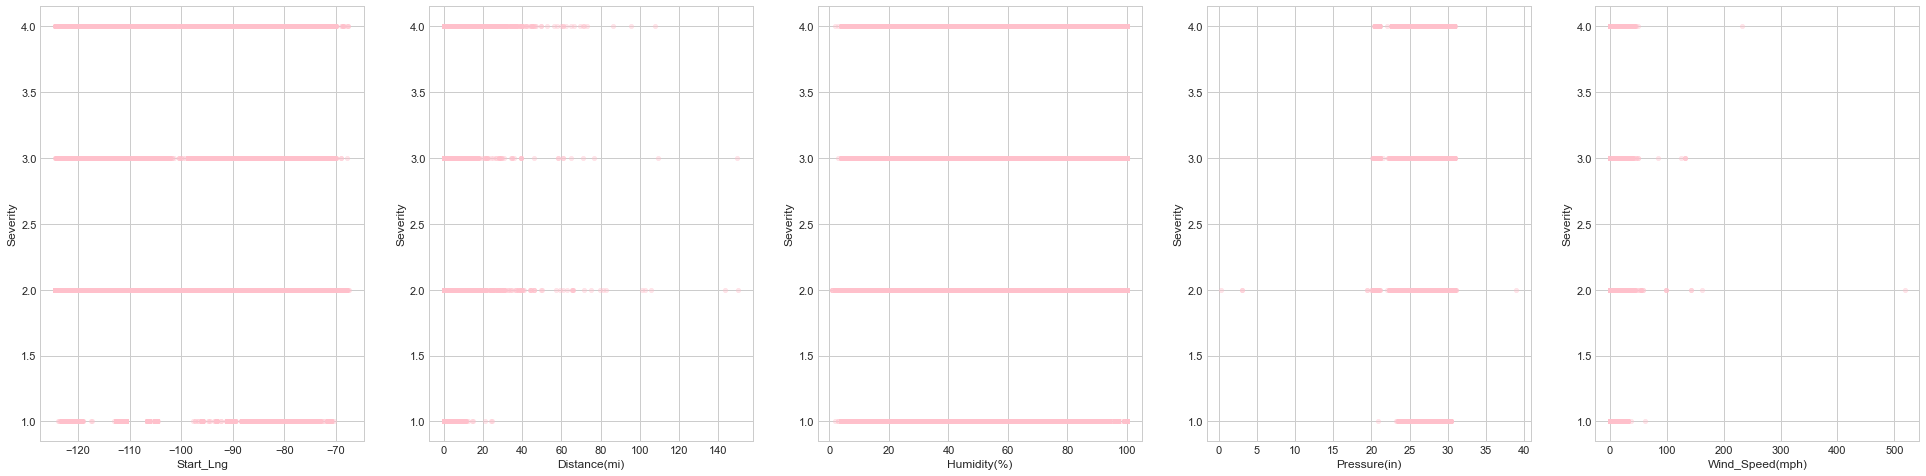

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30,8))

for xcol, ax in zip(['Start_Lng', 'Distance(mi)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)'], axes):
    data.plot(kind='scatter', x=xcol, y='Severity', ax=ax, alpha=0.4, color='pink')

### -------> OBSERVATION:
> The distribution of the scatterplot indicates that the features are somewhat correlated to the target variable

In [62]:
# Encoding binary columns
data = data.replace([True, False], [1,0])
test = test.replace([True, False], [1,0])
validation = validation.replace([True, False], [1,0])


# Encoding nominal columns
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

data = onehot_encode(
    data,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

test = onehot_encode(
    test,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

validation = onehot_encode(
    validation,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

In [63]:
data.head(3)

,Severity,Start_Lng,Distance(mi),Humidity(%),Pressure(in),Wind_Speed(mph),Weather_Timestamp_Year,Timezone_us/central,Timezone_us/eastern,Timezone_us/mountain,Timezone_us/pacific,Crossing_0,Crossing_1,Traffic_Signal_0,Traffic_Signal_1
377127,2,-84.52341,0.219,97,29.70,7.0,2016,0,1,0,0,1,0,1,0
108963,2,-81.53784,0.123,55,29.65,7.0,2016,0,1,0,0,1,0,1,0
410084,2,-84.03243,1.427,100,29.66,8.1,2016,0,1,0,0,1,0,0,1


In [64]:
formula = 'Severity ~ '+ '+'.join(data.columns[1:])
formula

'Severity ~ Start_Lng+Distance(mi)+Humidity(%)+Pressure(in)+Wind_Speed(mph)+Weather_Timestamp_Year+Timezone_us/central+Timezone_us/eastern+Timezone_us/mountain+Timezone_us/pacific+Crossing_0+Crossing_1+Traffic_Signal_0+Traffic_Signal_1'

### Ols stats model - Multivariate

In [65]:
%%time
from statsmodels.formula.api import ols

# Rename the copy DataFrame to fit into stats model
data1 = data.rename(columns={'Distance(mi)': 'Distance_mi', 'Humidity(%)': 'Humidity_perc', 'Pressure(in)': 'Pressure_in', 'Wind_Speed(mph)': 'Wind_Speed_mph'})

formula = 'Severity ~ '+ '+'.join(data1.columns[1:])

model = ols(formula='Severity ~ Start_Lng+Distance_mi+Humidity_perc+Pressure_in+Wind_Speed_mph+Weather_Timestamp_Year+Crossing_0+Crossing_1+Traffic_Signal_0+Traffic_Signal_1', data=data1).fit()
model.summary()

Wall time: 2.13 s


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     5787.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        09:07:49   Log-Likelihood:            -3.7744e+05
No. Observations:              438700   AIC:                         7.549e+05
Df Residuals:                  438688   BIC:                         7.550e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.7600      0.015    121.085      0.000       1.732       1.788
Weather_Timestamp_Year[T.2017]     0.0612      0.004     15.856      0.000       0.054       0.069
Weather_Timestamp_Year[T.2018]     0.1038      0.004     26.731      0.000       0.096       0.111
Weather_Timestamp_Year[T.2019]    -0.0219      0.004     -5.998      0.000      -0.029      -0.015
Weather_Timestamp_Year[T.2020]    -0.2933      0.003    -91.054      0.000      -0.300      -0.287
Start_Lng                          0.0061   5.02e-05    122.168      0.000       0.006       0.006
Distance_mi                        0.0486      0.001     90.714      0.000       0.048       0.050
Humidity_perc                      0.0006   3.95e-05     14.783      0.000       0.001       0.001
Pressure_in                       -0.0218      0.001    -23.584      0.000      -0.024      -0.020
Wind_Speed_mph                     0.0004      0.000      2.556      0.011       0.000       0.001
Crossing_0                         0.9140      0.008    121.809      0.000       0.899       0.929
Crossing_1                         0.8460      0.008    110.742      0.000       0.831       0.861
Traffic_Signal_0                   0.8901      0.007    119.411      0.000       0.875       0.905
Traffic_Signal_1                   0.8699      0.007    117.258      0.000       0.855       0.884
==============================================================================
Omnibus:                   120374.090   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           297706.166
Skew:                           1.523   Prob(JB):                         0.00
Kurtosis:                       5.647   Cond. No.                     2.51e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### -------------> OBSERVATION

<hr>

### Interpretation of the Model Coefficient, the P-value, the R-squared
> The output above shows that, when the other variables remain constant, if we compare two applicants whose 'Weather_Timestamp_Year[T.2017]' differ by one unit, the applicant with higher 'Weather_Timestamp_Year[T.2017]' will, on average, have 0.0156 units higher 'Income'.
> Using the P>|t| result, I can infer that the variables all independent variables are the statistically significant variables, as their p-value is less than 0.05.
> The Adj. R-squared 0.130 indicates the amount of variability not being explained by my model that much

<hr>

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>3. Feature Engineering</strong></h1>

## Train - Test -  Validation

+ Train dataset for train set

+ Validation for test set

+ Test for prediction on Kaggle

In [66]:
X = data.drop(['Severity'], axis = 1)
y = data['Severity']

X_train = X
y_train = y

accident_ID = test.ID.to_list()
TEST = test.drop(['ID'], axis = 1)

X_test = validation.drop(['Severity'], axis = 1)
y_test = validation['Severity']

# Rescale Inputs:
Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [67]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
TEST = pipeline.fit_transform(TEST)

Wall time: 976 ms


<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>4. Model training</strong></h1>

##  Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> - **Residuals** (R2):

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- **R2** is independent of each other, independent of x, normally distributed, common variance, have 0 mean

> All of these are **loss functions**, because we want to minimize them.

In [68]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# 📈 Linear Regression

In [69]:
%%time

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

Wall time: 276 ms


LinearRegression(normalize=True)

In [70]:
# print the intercept
print(lin_reg.intercept_)

2.2436165715621024


In [71]:
# Evaluate coefficients
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Start_Lng,9.747796e-02
Distance(mi),7.761550e-02
Humidity(%),1.421110e-02
Pressure(in),-8.454575e-03
Wind_Speed(mph),4.352152e-03
Weather_Timestamp_Year,-1.326360e-01
Timezone_us/central,6.997996e+10
Timezone_us/eastern,8.937173e+10
Timezone_us/mountain,4.484179e+10
Timezone_us/pacific,8.885022e+10


> Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Distance(mi)** is associated with an **increase of 7.761550e-02**.
- Holding all other features fixed, a 1 unit increase in **Pressure(in)** is associated with an **decrease of -8.454575e-03**.

In [72]:
%%time
# Predictions from our Model
pred = lin_reg.predict(X_test)

Wall time: 0 ns


In [73]:
%%time
# predictions from our model on test set
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.38923439900201473
MSE: 0.3326481831571049
RMSE: 0.5767566065136185
R2 Square 0.10585525855207756
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3914940044005007
MSE: 0.3346945311485564
RMSE: 0.5785279000606249
R2 Square 0.10676110058814925
__________________________________
Wall time: 89.3 ms


In [74]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.389234,0.332648,0.576757,0.105855


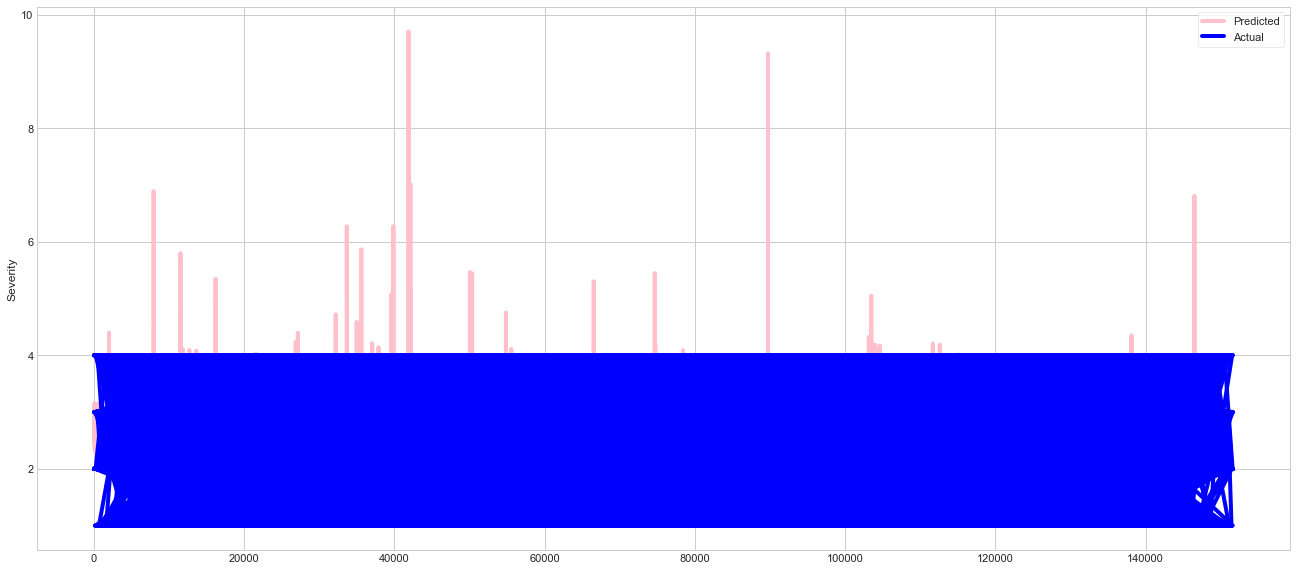

In [75]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual', color='blue')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [76]:
%%time

y_predict_model_lin_reg = lin_reg.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_model_lin_reg})

output.to_csv('submission_lin_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
Wall time: 421 ms


# Regularization Techniques

To overcome over-fitting, I do regularization which penalizes large coefficients. The following are the regularization algorithms.

#### Pros of Regularization

--> We can use a regularized model to reduce the dimensionality of the training dataset. Dimensionality reduction is important because of three main reasons:

--> Prevents Overfitting: A high-dimensional dataset having too many features can sometimes lead to overfitting (model captures both real and random effects).

--> Simplicity: An over-complex model having too many features can be hard to interpret especially when features are correlated with each other.

--> Computational Efficiency: A model trained on a lower dimensional dataset is computationally efficient (execution of algorithm requires less computational time).


#### Cons of Regularization

--> Regularization leads to dimensionality reduction, which means the machine learning model is built using a lower dimensional dataset. This generally leads to a high bias errror.

--> If regularization is performed before training the model, a perfect balance between bias-variance tradeoff must be used.


# 📈 Ridge Regression

> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

> Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

> $\alpha>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

> Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.
***

#### Pros

--> Avoids overfitting a model.

--> The ridge estimator is preferably good at improving the least-squares estimate when there is multicollinearity.


#### Cons

--> They include all the predictors in the final model.

--> They are unable to perform feature selection.

--> They shrink the coefficients towards zero.

--> They trade the variance for bias.

In [77]:
%%time

from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.38924229234768737
MSE: 0.3326473322269611
RMSE: 0.5767558688274972
R2 Square 0.105857545817579
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3915016867413133
MSE: 0.33469450365691206
RMSE: 0.5785278763006256
R2 Square 0.1067611739583536
__________________________________
Wall time: 131 ms


In [78]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.389234,0.332648,0.576757,0.105855
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858


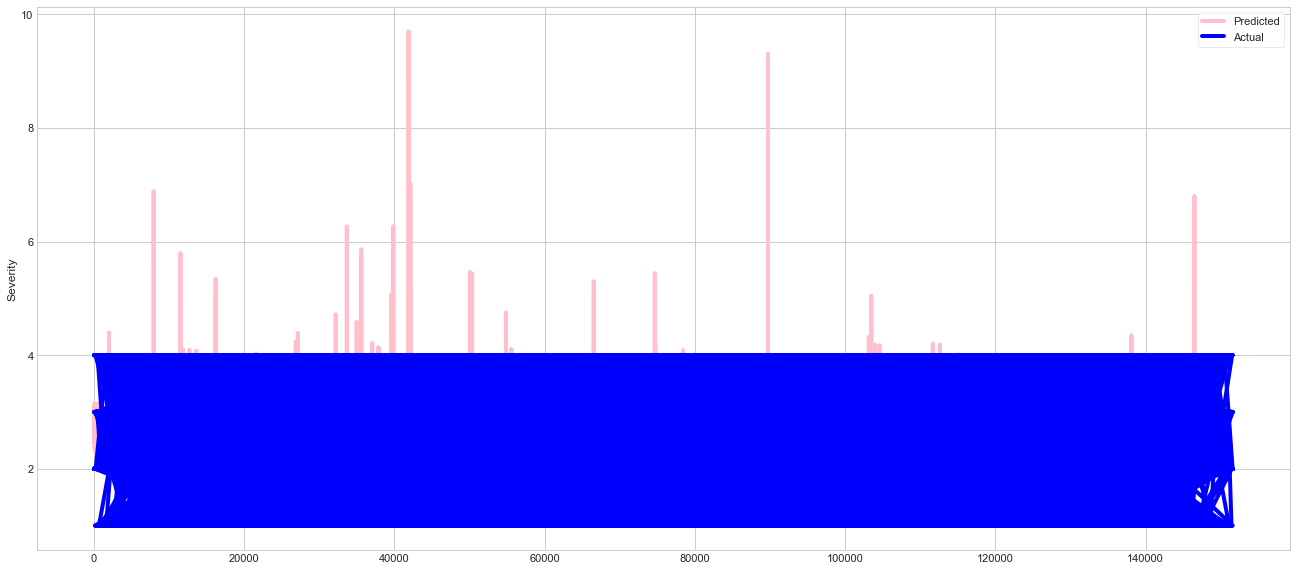

In [79]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual', color='blue')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [80]:
%%time

y_predict_Ridge = model.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_Ridge})

output.to_csv('submission_Ridge.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
Wall time: 415 ms


# 📈 Lasso Regression

> A linear model that estimates sparse coefficients.

> Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

> The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.
***

#### Pros

--> Avoids overfitting a model.

--> The ridge estimator is preferably good at improving the least-squares estimate when there is multicollinearity.


#### Cons

--> They include all the predictors in the final model.

--> They are unable to perform feature selection.

--> They shrink the coefficients towards zero.

--> They trade the variance for bias.


In [81]:
%%time

from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.4301567860780011
MSE: 0.36931402864572954
RMSE: 0.6077121264593373
R2 Square 0.007298962157360589
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.43198133503271285
MSE: 0.3719710178771606
RMSE: 0.6098942677851306
R2 Square 0.007276929558716283
__________________________________
Wall time: 121 ms


In [82]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.389234,0.332648,0.576757,0.105855
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299


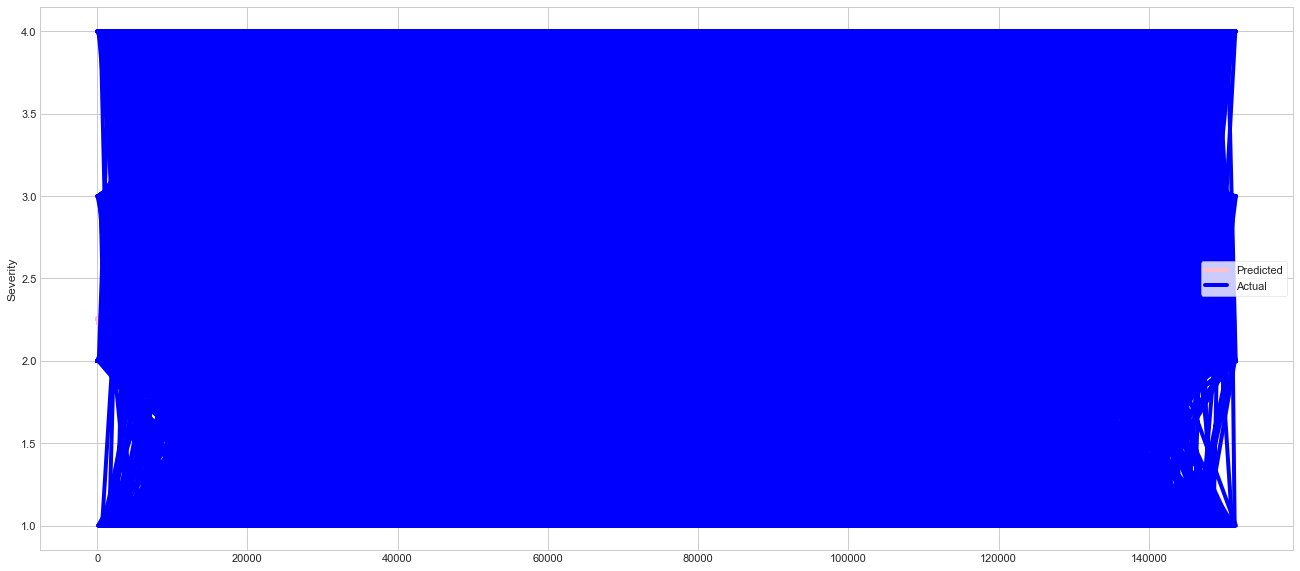

In [83]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual', color='blue')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [84]:
%%time

y_predict_Lasso = model.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_Lasso})

output.to_csv('submission_lasso.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
Wall time: 391 ms


# 📈 Elastic Net

> A linear regression model trained with L1 and L2 prior as regularizer. 

> This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

> Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

> A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

> The objective function to minimize is in this case

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$
***

#### Pros
--> Doesn’t have the problem of selecting more than n predictors when n<<p, whereas LASSO saturates when n<<p.

#### Cons
--> Computationally more expensive than LASSO or Ridge.

In [85]:
%%time 

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.4188488488511532
MSE: 0.35536083994218415
RMSE: 0.5961214976346552
R2 Square 0.044804563983580015
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4210181418015588
MSE: 0.357933800569773
RMSE: 0.5982756894357091
R2 Square 0.04473971239961849
__________________________________
Wall time: 231 ms


In [86]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.389234,0.332648,0.576757,0.105855
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805


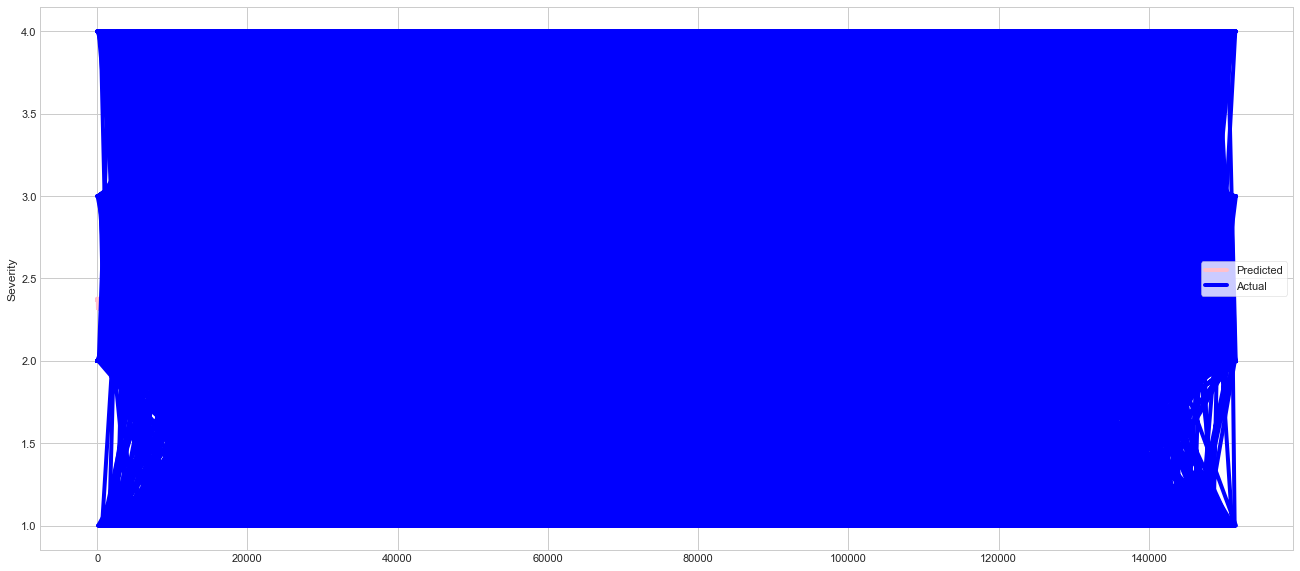

In [87]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual', color='blue')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [88]:
%%time

y_predict_ElasticNet = model.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_ElasticNet})

output.to_csv('submission_ElasticNet.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
Wall time: 394 ms


#  📈 Polynomial Regression
> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

***

> My data might be nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

> For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$
***

In [89]:
%%time

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)
TEST_2d = poly_reg.fit_transform(TEST)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.37743345685158264
MSE: 0.31371477037653084
RMSE: 0.5601024641764495
R2 Square 0.156747499461801
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.37987880312882877
MSE: 0.3153130573847787
RMSE: 0.5615274324418876
R2 Square 0.15848673301580396
__________________________________
Wall time: 3.44 s


In [90]:
results_df_2 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.389234,0.332648,0.576757,0.105855
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805
4,Polynomial Regression,0.377433,0.313715,0.560102,0.156747


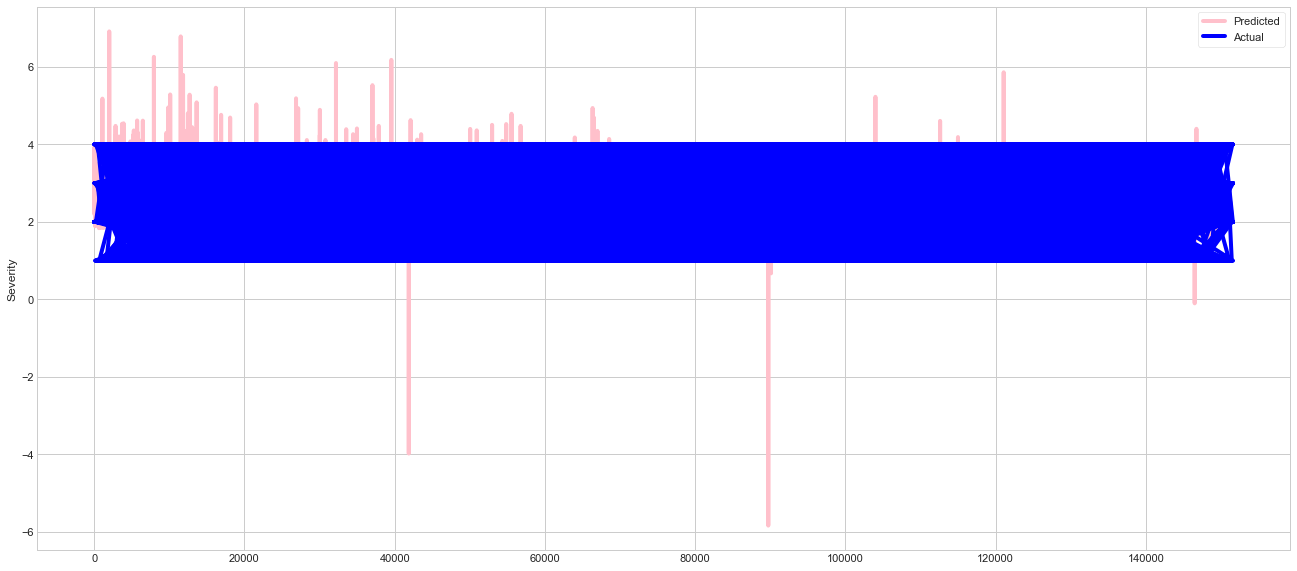

In [91]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual', color='blue')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [92]:
%%time

y_predict_poly_reg = lin_reg.predict(TEST_2d)

output = pd.DataFrame()
output['ID'] = accident_ID
output['Severity'] = y_predict_poly_reg

output.to_csv('submission_poly_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
Wall time: 495 ms


# 📈 Stochastic Gradient Descent

> Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [93]:
%%time

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.38916677511562037
MSE: 0.33264285874739946
RMSE: 0.5767519906748476
R2 Square 0.10586957034808453
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.39143057755567656
MSE: 0.33469479089649334
RMSE: 0.5785281245509966
R2 Square 0.10676040736809422
__________________________________
Wall time: 22.2 s


In [94]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.389234,0.332648,0.576757,0.105855
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805
4,Polynomial Regression,0.377433,0.313715,0.560102,0.156747
5,Stochastic Gradient Descent,0.389167,0.332643,0.576752,0.105870


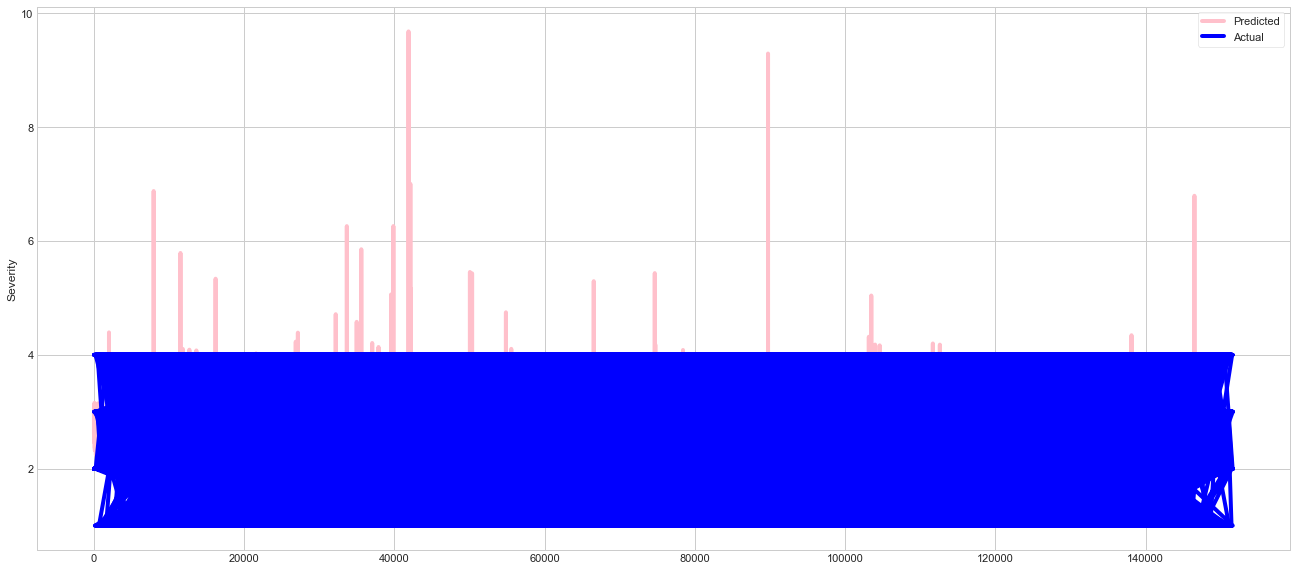

In [95]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual', color='blue')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [96]:
%%time

y_predict_poly_sgd_reg = sgd_reg.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_poly_sgd_reg})

output.to_csv('submission_sgd_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
Wall time: 348 ms


# 📈 Artficial Neural Network

In [97]:
%%time

# Install a pip package in the current Jupyter kernel
!{sys.executable} -m pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=11,
              verbose=1)


Epoch 1/11
438700/438700 [==============================] - 617s 1ms/step - loss: 0.3499 - val_loss: 0.315122 - loss:  - ETA: 8:22 - loss: 1.22 - ET - ETA: 8:21 - loss: 1.09 - ETA: 8:21 - loss: 1.08 - ETA: 8:21 - lo - ETA: 8:21 - loss:  - ETA: 8:21 - los - ETA: 8:21 - loss: 0.985 - ETA: 8: - ETA: 8:20 - los - ETA: 8 - ETA: 8:24 - lo -  - ETA: 8:2 - ETA: 8:14 - los - ETA: 8:14 - los - ETA: 8:13 - loss: 0.628 - ETA: 8:13 - lo - ETA: 8:13 - loss: 0.585 - ETA: 8:13 - - ETA: 8:12 - - ETA: 8:08 - loss: 0.559 - ETA: 8:08 - loss:  - ETA: 8:06 - loss: 0.54 - ETA: 8:06 - los - - ET - ETA - ETA: 8:01 -  - ETA: 7:57 - ETA: 7:56 - l - ETA: 7:55 - loss - ETA: 7:37 - - ETA: 7:36 - loss: 0 -  - ETA: 7:27 - loss: 0. - ETA: 7:27 - loss:  - ETA: 7:21 - loss:  - ETA: 7:21  - ETA: 7:20 - loss:  - ETA: 7:19 - loss: 0.44 - ETA: 7: - ETA: - ETA: 7:16 - loss: 0 - ETA: 7:16 - l - ETA: 7:15 - los - ETA:  - - ETA: 7:09 - l - ETA: 7:08 - ETA: 7:08 - loss: 0.43 - ETA: 7 - ETA: 7:04 - los - ETA: 7:04 - ETA - ETA: 6:

In [98]:
%%time

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.3475615423050131
MSE: 0.3005272953578733
RMSE: 0.548203698781642
R2 Square 0.19219489415068014
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.34908629743353037
MSE: 0.3011132380619885
RMSE: 0.5487378591476886
R2 Square 0.19638347109577714
__________________________________
Wall time: 21.6 s


In [99]:
results_df_2 = pd.DataFrame(data=[["Artificial Neural Network", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.389234,0.332648,0.576757,0.105855
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805
4,Polynomial Regression,0.377433,0.313715,0.560102,0.156747
5,Stochastic Gradient Descent,0.389167,0.332643,0.576752,0.105870
6,Artificial Neural Network,0.347562,0.300527,0.548204,0.192195


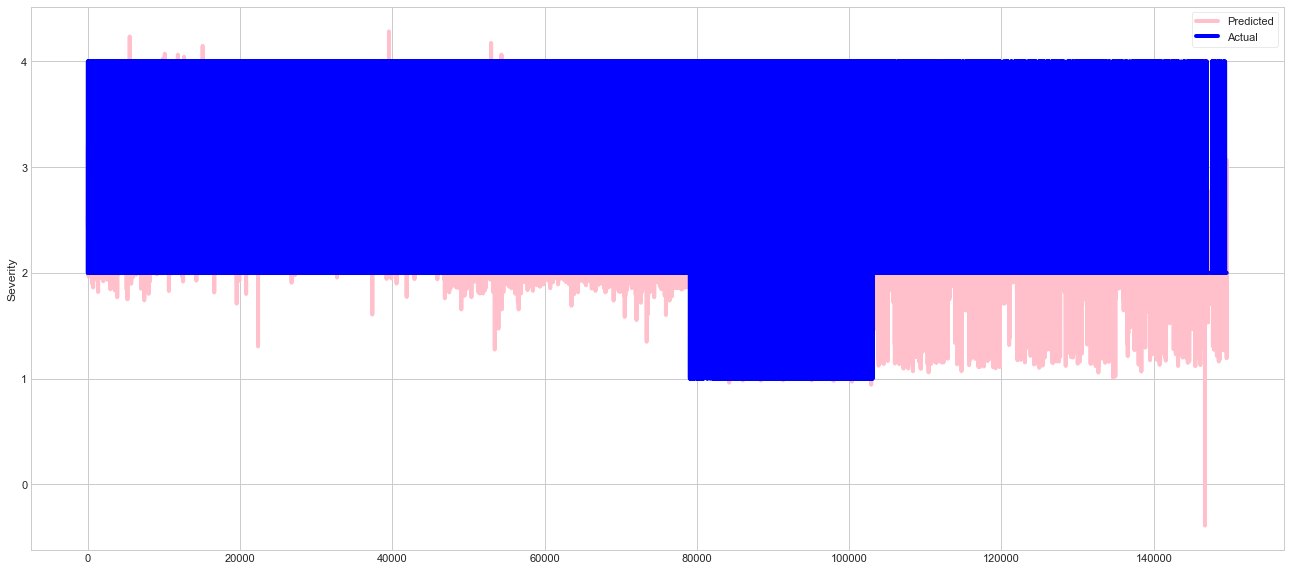

In [100]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual', color='blue')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [101]:
y_predict_model_arti = model.predict(TEST)

output = pd.DataFrame()
output['ID'] = accident_ID
output['Severity'] = y_predict_model_arti

output.to_csv('submission_arti.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


### -----------> OBSERVATION

<hr>

> A comparison between multiple linear regression model and the model produced by the ANN is presented in tables above ,it can be seen that the ANN model has better predictive power than the above regression models. Hoever, it requires significantly higher computing power and time

<hr>

# 📈 Other Neural Network Models

In [102]:
from sklearn.neural_network import MLPRegressor

# mlp_reg = MLPRegressor(activation='relu',
#                        hidden_layer_sizes=(1,),
#                        solver='lbfgs',
#                        verbose=True,
#                        max_iter=100,
#                        random_state=42)
#
# # RMSE: 0.576582

# mlp_reg = MLPRegressor(activation = 'relu',
#                        hidden_layer_sizes= (5, ),
#                        solver='lbfgs',
#                        verbose=True,
#                        max_iter=100)
#
# # RMSE: 0.571221

# mlp_reg = MLPRegressor(activation = 'relu',
#                        hidden_layer_sizes= (2, 4),
#                        solver='lbfgs',
#                        verbose=True,
#                        max_iter=100)
#
# # RMSE: 0.570725

# mlp_reg = MLPRegressor(activation = 'logistic',
#                        hidden_layer_sizes= (2, 4),
#                        solver='lbfgs',
#                        verbose=True,
#                        max_iter=1000,
#                        learning_rate_init=0.001,
#                        learning_rate='adaptive',
#                        early_stopping=True,
#                        validation_fraction=0.1,
#                        n_iter_no_change=10)
# # RMSE: 0.561204

mlp_reg = MLPRegressor(activation = 'relu',
                       hidden_layer_sizes= (2, 6, 4),
                       solver='lbfgs',
                       verbose=True,
                       max_iter=1000,
                       learning_rate_init=0.001)

# 0.556085

mlp_reg.fit(X_train, y_train)
y_pred = mlp_reg.predict(X_test)
mlp_reg.score(X_train, y_train)
r2_score(y_test, y_pred)

0.15533766114671443

In [103]:
results_df_2 = pd.DataFrame(data=[["Other Neural Network", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.389234,0.332648,0.576757,0.105855
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805
4,Polynomial Regression,0.377433,0.313715,0.560102,0.156747
5,Stochastic Gradient Descent,0.389167,0.332643,0.576752,0.105870
6,Artificial Neural Network,0.347562,0.300527,0.548204,0.192195
7,Other Neural Network,0.347562,0.300527,0.548204,0.192195


In [104]:
%%time
y_predict_mlp_reg = mlp_reg.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_mlp_reg})

output.to_csv('submission_mlp_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
Wall time: 486 ms


### -----------> OBSERVATION

<hr>

> Simpler models worked well for my data and having a single layer with many neurons did not perform well. ReLU activation worked better than logistic activation.

<hr>

# 📈 Random Forest Regressor

In [105]:
%%time

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.2984630468807435
MSE: 0.2475952107776904
RMSE: 0.4975893997842904
R2 Square 0.3344741774224438
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.11507883978865806
MSE: 0.03708925671593597
RMSE: 0.19258571264747543
R2 Square 0.901015511860152
__________________________________
Wall time: 35min 19s


In [106]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389234,0.332648,0.576757,0.105855,NaN
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,NaN
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299,NaN
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805,NaN
4,Polynomial Regression,0.377433,0.313715,0.560102,0.156747,NaN
5,Stochastic Gradient Descent,0.389167,0.332643,0.576752,0.105870,NaN
6,Artificial Neural Network,0.347562,0.300527,0.548204,0.192195,NaN
7,Other Neural Network,0.347562,0.300527,0.548204,0.192195,NaN
8,Random Forest Regressor,0.298463,0.247595,0.497589,0.334474,0.0


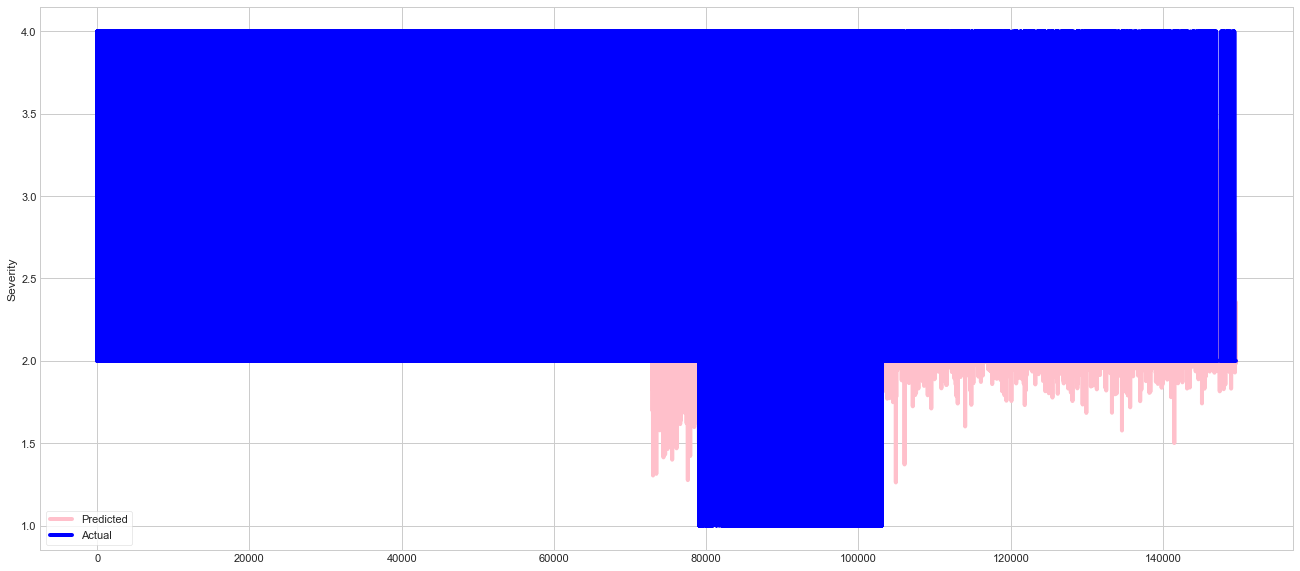

In [107]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual', color='blue')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [108]:
y_predict_rf_reg = rf_reg.predict(TEST)

output = pd.DataFrame()
output['ID'] = accident_ID
output['Severity'] = y_predict_rf_reg

output.to_csv('submission_rf_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


<a id="5"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>5. Model Comparision and Export</strong></h1>

<AxesSubplot:ylabel='Model'>

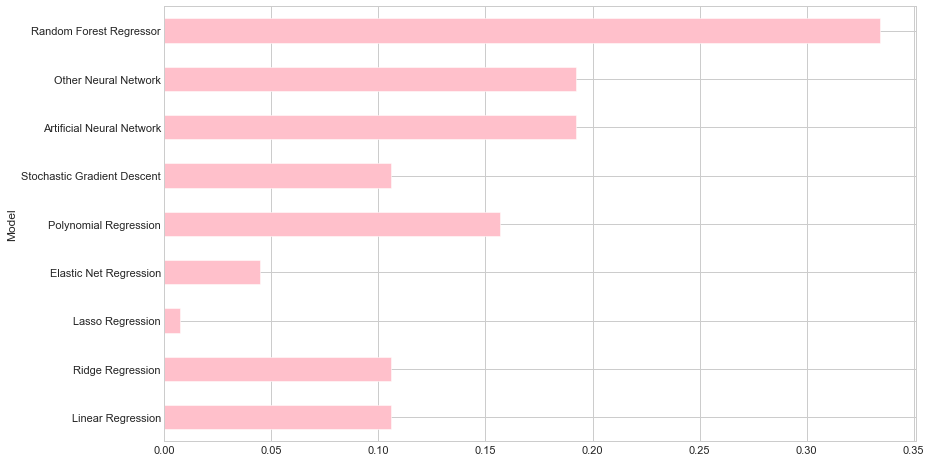

In [109]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8), color='pink')

In [111]:
# import joblib

# # Save the model as a pickle in a file
# joblib.dump(lin_reg, 'lin_reg.pkl')
# joblib.dump(model, 'arti.pkl')
# joblib.dump(rf_reg, 'RandomForest.pkl')

### -----------> OBSERVATION
> The Random Forest Regressor model has the best performance in terms of R2 Square. The Random Forest Regressor model is chosen as the superior approach in predicting the number and severity of crashes. Besides, performance and sensitivity analysis prove the excellent performance and validation.

> List of feature selected: ['Timezone', 'Crossing', 'Traffic_Signal', 'Weather_Timestamp_Year', 'Severity', 'Start_Lng', 'Distance(mi)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)']

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>5. Summary</strong></h1>

> The maximum number of accidents have taken place at around 4-5P.M, and a relatively high has taken place from 7–8 AM. This can result from the rush hour that most people come to and back to work, school, and home.

> The state has the most number of accidents in California (28%), followed by Florida(10%) in the USA (2016-2020).

> The density of points is more at the eastern and western coasts than in the middle of the country, indicating that more accidents were recorded at the two sides from February 2016 to Dec 2020 in the Contiguous United States rather than its middle part.

> The graph shows the accident is more or less proportional to the severity

> The accidents with a severity level of 4 have the longest distance.
The longer the distance, the more severe the accidents

> Fatal accidents occurred near a traffic signal, junction and crossing were present. The driver might fail to pay attention before pulling out due to impatience, impairment of one form or another, or a simple failure to judge the distance and speed of an oncoming vehicle.

> The most common weather condition is Fair, followed by Mostly Cloudy and Overcast.

> Surprisingly, significantly higher accident cases were recorded from September to November, but the more severe impact on traffic happens around February to May.

> The best model I get overall is Random Forest Regressor  with the lowest RMSE value on the test dataset

<a id="7"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>6. References</strong></h1>

> Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. [“A Countrywide Traffic Accident Dataset.”](https://arxiv.org/abs/1906.05409), arXiv preprint arXiv:1906.05409 (2019). Access Nov 27, 2021.

> Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. [“Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.”](https://arxiv.org/abs/1909.09638) In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019. Access Nov 27, 2021.

> SIGKDD International Conference on Knowledge Discovery & Data Mining. ACM. Access Dec 2, 2021.

### ANN model:

> M. Çodur and A. Tortum, "An Artificial Neural Network Model for Highway Accident Prediction: A Case Study of Erzurum, Turkey", PROMET - Traffic&Transportation, vol. 27, no. 3, pp. 217-225, 2015. Available: 10.7307/ptt.v27i3.1551 [Accessed 18 December 2021].

> A. Alqatawna, A. Rivas Álvarez and S. García-Moreno, "Comparison of Multivariate Regression Models and Artificial Neural Networks for Prediction Highway Traffic Accidents in Spain: A Case Study", Transportation Research Procedia, vol. 58, pp. 277-284, 2021. Available: 10.1016/j.trpro.2021.11.038 [Accessed 18 December 2021].

>M. Ghasedi, M. Sarfjoo and I. Bargegol, "Prediction and Analysis of the Severity and Number of Suburban Accidents Using Logit Model, Factor Analysis and Machine Learning: A case study in a developing country", SN Applied Sciences, vol. 3, no. 1, 2021. Available: 10.1007/s42452-020-04081-3 [Accessed 19 December 2021].

<a id="7"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>7. Appendix</strong></h1>

**Link to the github repo:** https://github.com/tnathu-ai/severity_prediction_linear_regression